In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [3]:
# %pip install scikit-learn

In [4]:
cols = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3long","fM3Trans","fAlpha","fDist","class"]
data = pd.read_csv("data/magic04.data",names = cols)

# data.tail()
data.head()


fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [5]:
data['class'].unique()


array(['g', 'h'], dtype=object)

In [6]:
data['class'] = (data['class'] == 'g').astype(int)

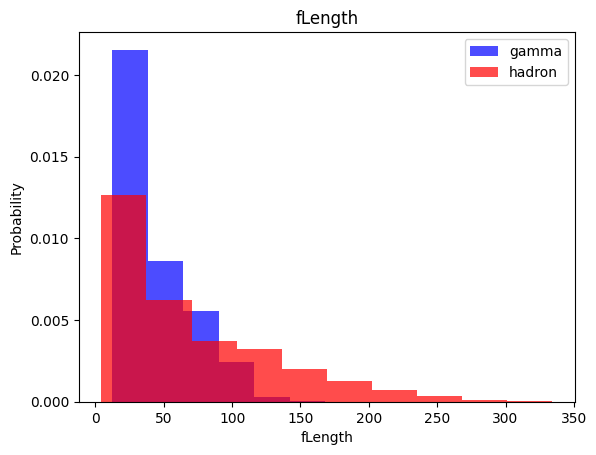

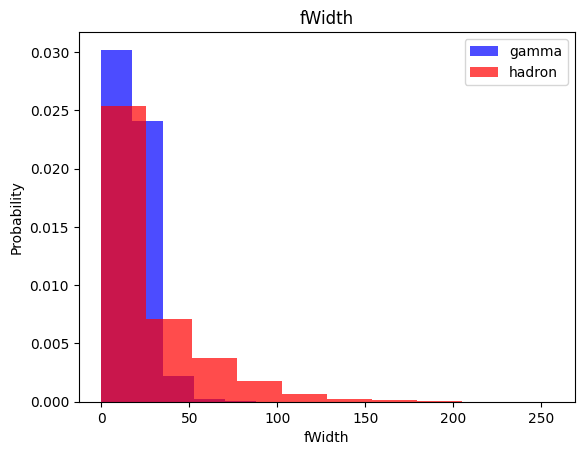

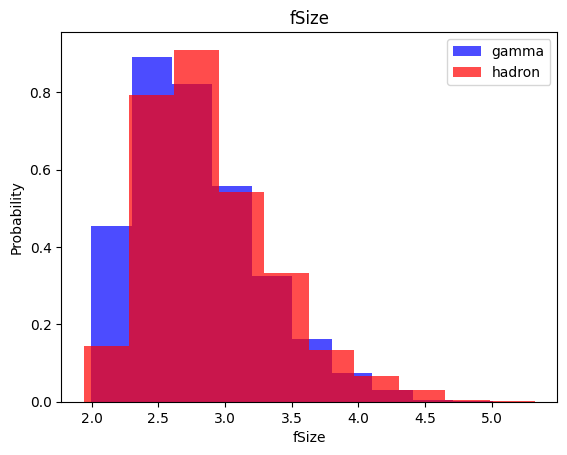

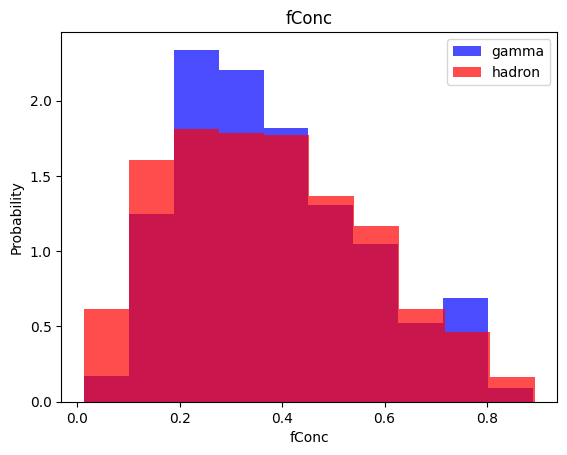

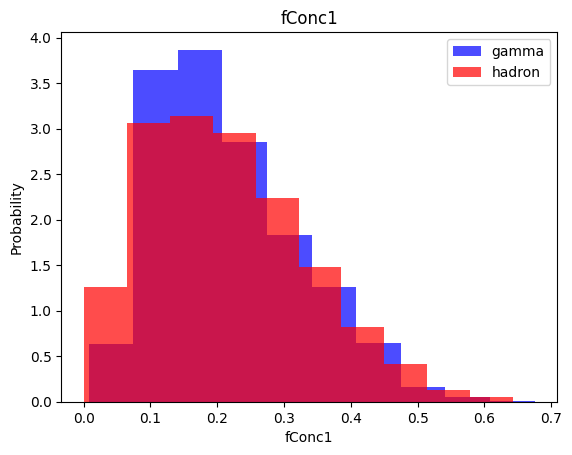

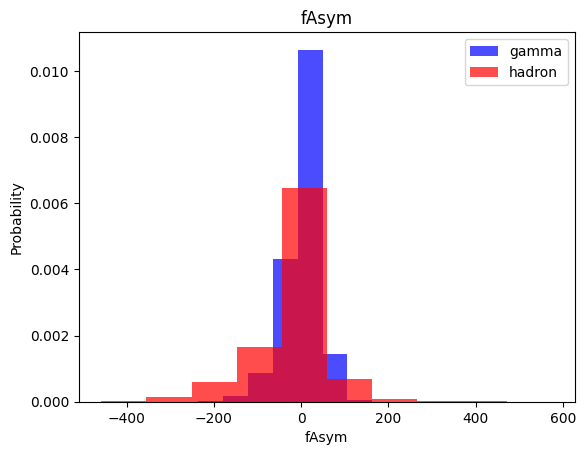

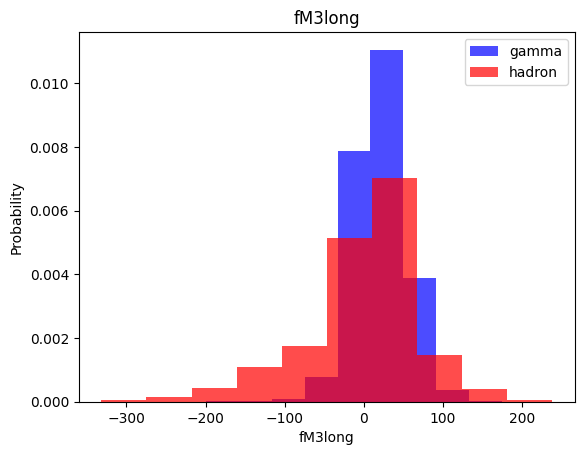

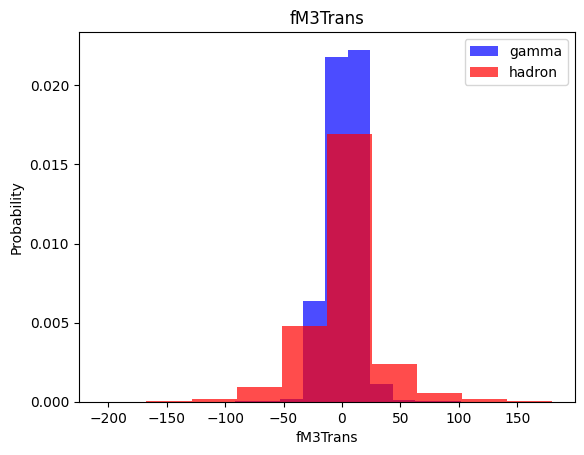

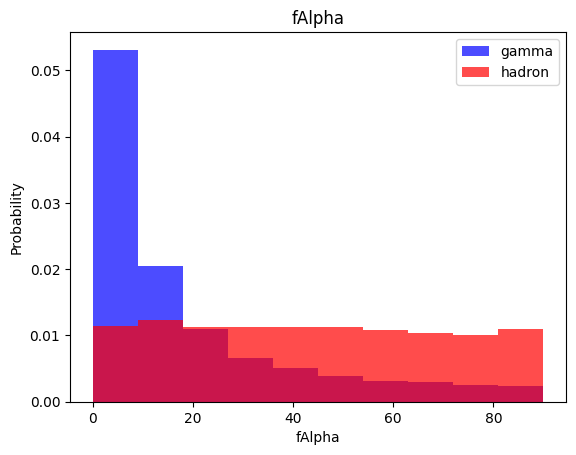

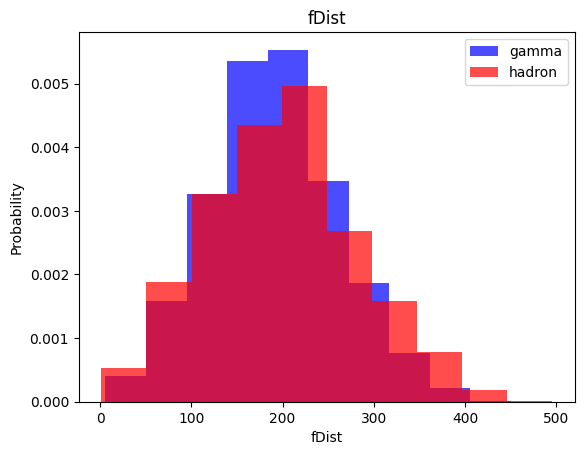

In [7]:
for label in cols[:-1]:
  plt.hist(data[data['class'] == 1][label],color = 'blue', label = 'gamma', alpha = 0.7, density=True)
  plt.hist(data[data['class'] == 0][label],color = 'red' , label = 'hadron', alpha = 0.7, density=True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [8]:
train, valid , test  = np.split(data.sample(frac=1),[int(0.6*len(data)),int(0.8*len(data))])

c:\Users\Onizea\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [9]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data , X , y

In [10]:
a = 5
b = 6
# c=a 
# a = b
# b =c
# print(a,b)
a,b = b,a
print(a,b)


6 5


In [11]:
print(len(train[train['class'] == 1]))  # gamma
print(len(train[train['class'] == 0]))  # hadero

7362
4050


In [12]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=True)
test, X_test, y_test = scale_dataset(test, oversample=True)

In [13]:
sum(y_train == 1)

np.int64(7362)

In [14]:
sum(y_train == 0)

np.int64(7362)

### ***K***-***nearest neighbors*** (KNN)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [16]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
y_pred = knn_model.predict(X_test)

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78      2467
           1       0.76      0.87      0.81      2467

    accuracy                           0.80      4934
   macro avg       0.80      0.80      0.80      4934
weighted avg       0.80      0.80      0.80      4934



## Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB

In [20]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [21]:
y_pred = nb_model.predict(X_test)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.41      0.54      2467
           1       0.60      0.90      0.72      2467

    accuracy                           0.66      4934
   macro avg       0.70      0.66      0.63      4934
weighted avg       0.70      0.66      0.63      4934



# Logistic Regresion

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_pred = lg_model.predict(X_test)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75      2467
           1       0.74      0.82      0.78      2467

    accuracy                           0.76      4934
   macro avg       0.77      0.76      0.76      4934
weighted avg       0.77      0.76      0.76      4934



SVM (Support Vector Machine)


In [27]:
from sklearn.svm import SVC

In [28]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [29]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83      2467
           1       0.80      0.90      0.85      2467

    accuracy                           0.84      4934
   macro avg       0.85      0.84      0.84      4934
weighted avg       0.85      0.84      0.84      4934



## Neural NetWorks

In [ ]:
#%pip install tensorflow

^C
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import tensorflow as tf

c:\Users\Onizea\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Onizea\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Onizea\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/fram

In [32]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.legend()
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()
  ax2.grid(True)

  plt.show()

In [33]:
def train_model(X_train, y_train, num_nodes, dropout_prod, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prod),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prod),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(
      lr), loss='binary_crossentropy', metrics=['accuracy'])
  history = nn_model.fit(X_train, y_train, epochs=epochs,
                         batch_size=batch_size, validation_split=0.2, verbose=1)

  return nn_model, history

16 nodes, drop 0, learning rate 0.01, batch size 32


c:\Users\Onizea\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8187 - loss: 0.4100 - val_accuracy: 0.6628 - val_loss: 0.6826
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8494 - loss: 0.3570 - val_accuracy: 0.7219 - val_loss: 0.5492
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8559 - loss: 0.3443 - val_accuracy: 0.6608 - val_loss: 0.6680
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8577 - loss: 0.3387 - val_accuracy: 0.6954 - val_loss: 0.6205
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8603 - loss: 0.3299 - val_accuracy: 0.7348 - val_loss: 0.5579
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8617 - loss: 0.3281 - val_accuracy: 0.7328 - val_loss: 0.5139
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8578 - loss: 0.3282 - val_accuracy: 0.7942 - val_loss: 0.3912
Epoch 8/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8623 - loss: 0.3253 - val_accu

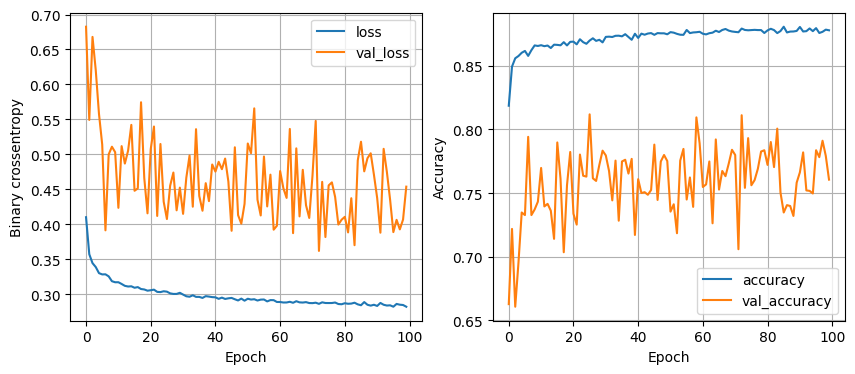

16 nodes, drop 0, learning rate 0.01, batch size 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8065 - loss: 0.4244 - val_accuracy: 0.7287 - val_loss: 0.5607
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8469 - loss: 0.3553 - val_accuracy: 0.6621 - val_loss: 0.6419
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8530 - loss: 0.3464 - val_accuracy: 0.7090 - val_loss: 0.5617
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8588 - loss: 0.3343 - val_accuracy: 0.7980 - val_loss: 0.3855
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8575 - loss: 0.3351 - val_accuracy: 0.7219 - val_loss: 0.5451
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8628 - loss: 0.3246 - val_accuracy: 0.7779 - val_loss: 0.4717
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8622 - loss: 0.3235 - val_accuracy: 0.7671 - val_loss: 0.4754
Epoch 8/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3

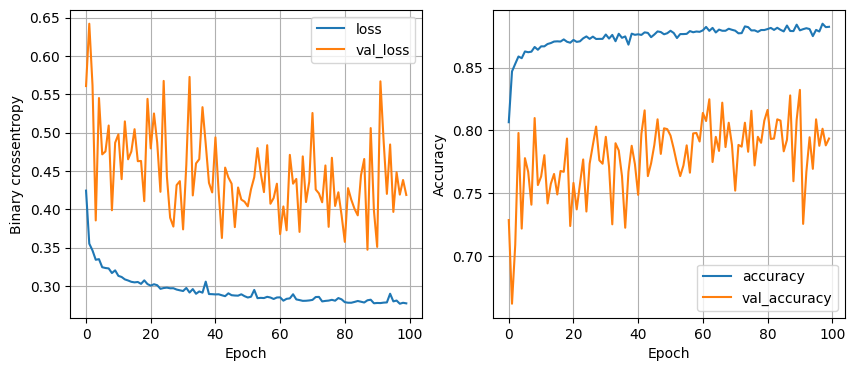

16 nodes, drop 0, learning rate 0.01, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7812 - loss: 0.4539 - val_accuracy: 0.7002 - val_loss: 0.5931
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8432 - loss: 0.3677 - val_accuracy: 0.6774 - val_loss: 0.6341
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8497 - loss: 0.3553 - val_accuracy: 0.6761 - val_loss: 0.6254
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8553 - loss: 0.3397 - val_accuracy: 0.7328 - val_loss: 0.5498
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8603 - loss: 0.3342 - val_accuracy: 0.7222 - val_loss: 0.5653
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8597 - loss: 0.3298 - val_accuracy: 0.6917 - val_loss: 0.6079
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8575 - loss: 0.3370 - val_accuracy: 0.6822 - val_loss: 0.5890
Epoch 8/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accur

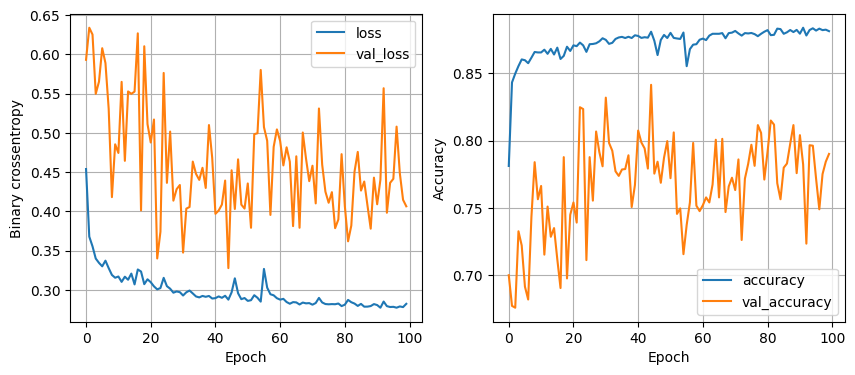

16 nodes, drop 0, learning rate 0.005, batch size 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8075 - loss: 0.4159 - val_accuracy: 0.7199 - val_loss: 0.5805
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8523 - loss: 0.3532 - val_accuracy: 0.7531 - val_loss: 0.4793
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8569 - loss: 0.3377 - val_accuracy: 0.7637 - val_loss: 0.4547
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8575 - loss: 0.3302 - val_accuracy: 0.7362 - val_loss: 0.5016
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8609 - loss: 0.3288 - val_accuracy: 0.7762 - val_loss: 0.4636
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8634 - loss: 0.3235 - val_accuracy: 0.7073 - val_loss: 0.5458
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8625 - loss: 0.3217 - val_accuracy: 0.7864 - val_loss: 0.3852
Epoch 8/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 

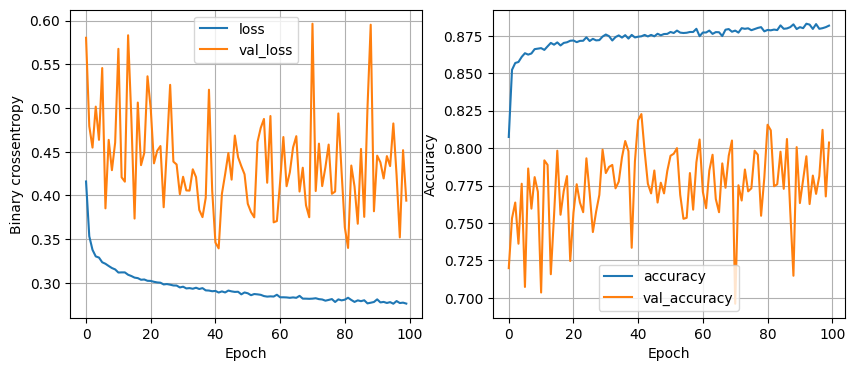

16 nodes, drop 0, learning rate 0.005, batch size 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8043 - loss: 0.4294 - val_accuracy: 0.7416 - val_loss: 0.5049
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8513 - loss: 0.3565 - val_accuracy: 0.6907 - val_loss: 0.5944
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8541 - loss: 0.3435 - val_accuracy: 0.7219 - val_loss: 0.5372
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8575 - loss: 0.3370 - val_accuracy: 0.6808 - val_loss: 0.6154
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8587 - loss: 0.3314 - val_accuracy: 0.7514 - val_loss: 0.4794
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8602 - loss: 0.3270 - val_accuracy: 0.7851 - val_loss: 0.4086
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8598 - loss: 0.3261 - val_accuracy: 0.7290 - val_loss: 0.5327
Epoch 8/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 

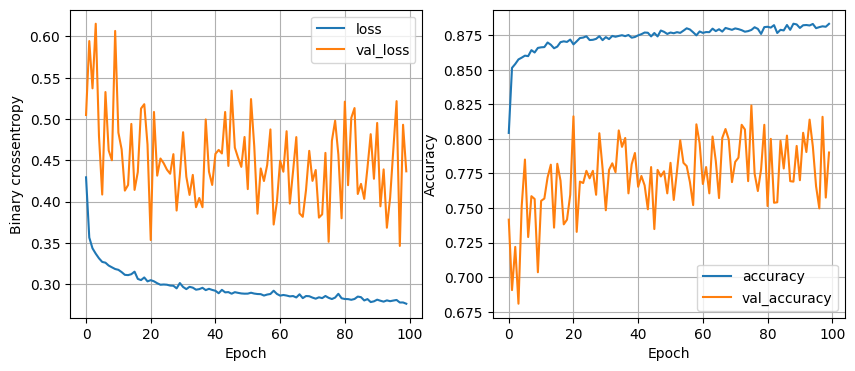

16 nodes, drop 0, learning rate 0.005, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7720 - loss: 0.4721 - val_accuracy: 0.6248 - val_loss: 0.7014
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8356 - loss: 0.3807 - val_accuracy: 0.6975 - val_loss: 0.5777
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8453 - loss: 0.3623 - val_accuracy: 0.7351 - val_loss: 0.5415
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8492 - loss: 0.3526 - val_accuracy: 0.7518 - val_loss: 0.5001
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8534 - loss: 0.3460 - val_accuracy: 0.7307 - val_loss: 0.5082
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8578 - loss: 0.3391 - val_accuracy: 0.7222 - val_loss: 0.5201
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8564 - loss: 0.3372 - val_accuracy: 0.7650 - val_loss: 0.4318
Epoch 8/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - ac

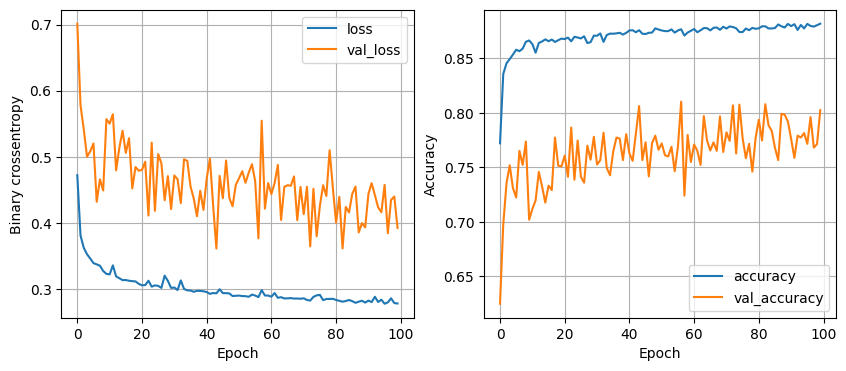

16 nodes, drop 0, learning rate 0.001, batch size 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7620 - loss: 0.4999 - val_accuracy: 0.6224 - val_loss: 0.6633
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8178 - loss: 0.4071 - val_accuracy: 0.6309 - val_loss: 0.6289
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8283 - loss: 0.3880 - val_accuracy: 0.6509 - val_loss: 0.6359
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8360 - loss: 0.3762 - val_accuracy: 0.6890 - val_loss: 0.5630
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8425 - loss: 0.3661 - val_accuracy: 0.7022 - val_loss: 0.5715
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8457 - loss: 0.3582 - val_accuracy: 0.7182 - val_loss: 0.5399
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8508 - loss: 0.3526 - val_accuracy: 0.7202 - val_loss: 0.5511
Epoch 8/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 

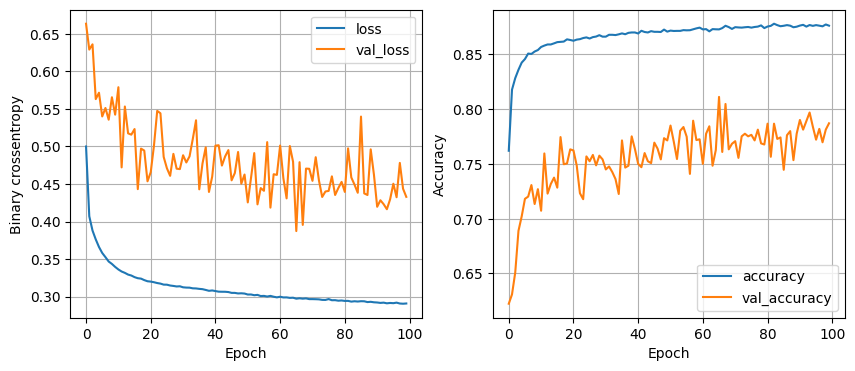

16 nodes, drop 0, learning rate 0.001, batch size 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6490 - loss: 0.6171 - val_accuracy: 0.5637 - val_loss: 0.6466
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7826 - loss: 0.4544 - val_accuracy: 0.6319 - val_loss: 0.6223
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8084 - loss: 0.4175 - val_accuracy: 0.6601 - val_loss: 0.6092
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8218 - loss: 0.4003 - val_accuracy: 0.6574 - val_loss: 0.6187
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8312 - loss: 0.3863 - val_accuracy: 0.7124 - val_loss: 0.5630
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8412 - loss: 0.3748 - val_accuracy: 0.6961 - val_loss: 0.5884
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8466 - loss: 0.3658 - val_accuracy: 0.7338 - val_loss: 0.5412
Epoch 8/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 

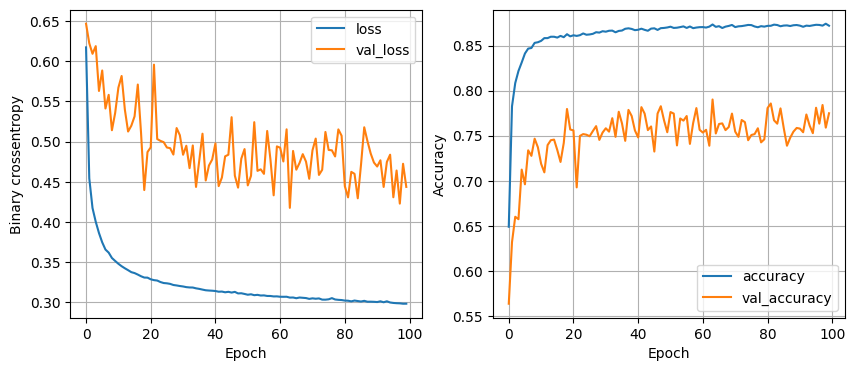

16 nodes, drop 0, learning rate 0.001, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6973 - loss: 0.6014 - val_accuracy: 0.3691 - val_loss: 0.7686
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7706 - loss: 0.4779 - val_accuracy: 0.5406 - val_loss: 0.7326
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7962 - loss: 0.4341 - val_accuracy: 0.6000 - val_loss: 0.6701
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8026 - loss: 0.4191 - val_accuracy: 0.6428 - val_loss: 0.6056
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8111 - loss: 0.4084 - val_accuracy: 0.6397 - val_loss: 0.6308
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8176 - loss: 0.4004 - val_accuracy: 0.6428 - val_loss: 0.6213
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8214 - loss: 0.3931 - val_accuracy: 0.6771 - val_loss: 0.5827
Epoch 8/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accu

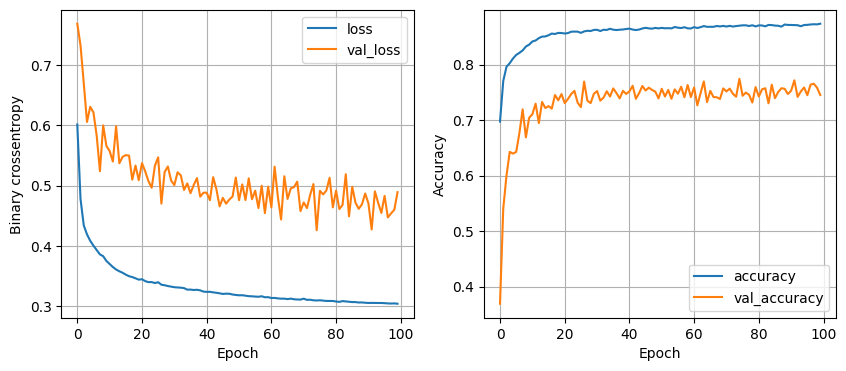

16 nodes, drop 0.2, learning rate 0.01, batch size 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7942 - loss: 0.4542 - val_accuracy: 0.6995 - val_loss: 0.5849
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8285 - loss: 0.3970 - val_accuracy: 0.7772 - val_loss: 0.4500
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8362 - loss: 0.3801 - val_accuracy: 0.7514 - val_loss: 0.5108
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8430 - loss: 0.3725 - val_accuracy: 0.7341 - val_loss: 0.5041
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8418 - loss: 0.3746 - val_accuracy: 0.7195 - val_loss: 0.5307
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8446 - loss: 0.3663 - val_accuracy: 0.7117 - val_loss: 0.4999
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8422 - loss: 0.3662 - val_accuracy: 0.7331 - val_loss: 0.5214
Epoch 8/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s

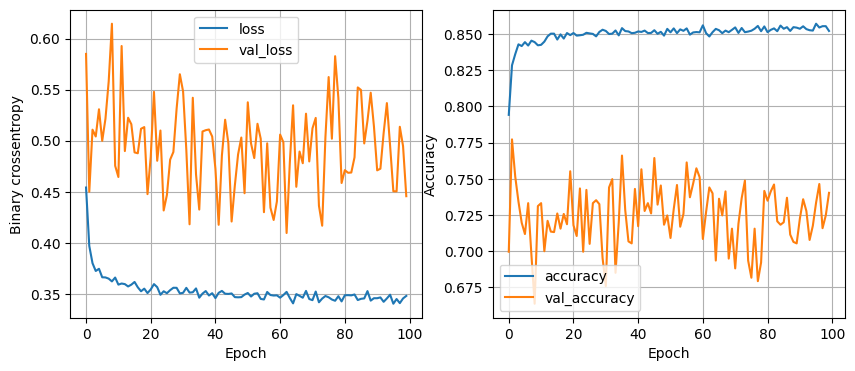

16 nodes, drop 0.2, learning rate 0.01, batch size 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7925 - loss: 0.4526 - val_accuracy: 0.6183 - val_loss: 0.6788
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8296 - loss: 0.4009 - val_accuracy: 0.7307 - val_loss: 0.5155
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8386 - loss: 0.3822 - val_accuracy: 0.7413 - val_loss: 0.4900
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8421 - loss: 0.3724 - val_accuracy: 0.6849 - val_loss: 0.5697
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8406 - loss: 0.3701 - val_accuracy: 0.6744 - val_loss: 0.6563
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8423 - loss: 0.3719 - val_accuracy: 0.7542 - val_loss: 0.4412
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8509 - loss: 0.3587 - val_accuracy: 0.6924 - val_loss: 0.5746
Epoch 8/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s

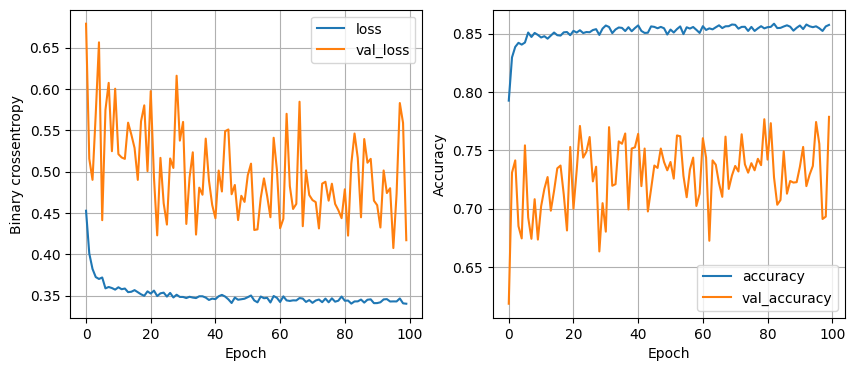

16 nodes, drop 0.2, learning rate 0.01, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7679 - loss: 0.4844 - val_accuracy: 0.6723 - val_loss: 0.5609
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8212 - loss: 0.4082 - val_accuracy: 0.7443 - val_loss: 0.5435
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8350 - loss: 0.3852 - val_accuracy: 0.7857 - val_loss: 0.4241
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8391 - loss: 0.3786 - val_accuracy: 0.7467 - val_loss: 0.4798
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8454 - loss: 0.3678 - val_accuracy: 0.7331 - val_loss: 0.5373
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8412 - loss: 0.3720 - val_accuracy: 0.7280 - val_loss: 0.5215
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8514 - loss: 0.3611 - val_accuracy: 0.7358 - val_loss: 0.4952
Epoch 8/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc

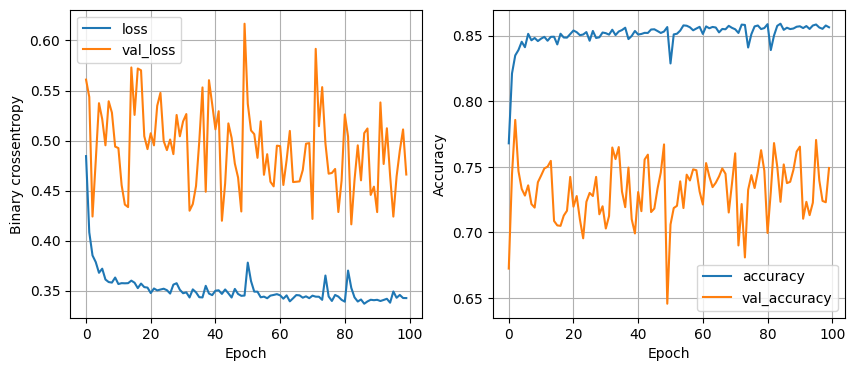

16 nodes, drop 0.2, learning rate 0.005, batch size 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7721 - loss: 0.4758 - val_accuracy: 0.6367 - val_loss: 0.6172
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8296 - loss: 0.4051 - val_accuracy: 0.7087 - val_loss: 0.5536
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8378 - loss: 0.3858 - val_accuracy: 0.6696 - val_loss: 0.5891
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8397 - loss: 0.3758 - val_accuracy: 0.7528 - val_loss: 0.4832
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8441 - loss: 0.3679 - val_accuracy: 0.7202 - val_loss: 0.5164
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8458 - loss: 0.3628 - val_accuracy: 0.7413 - val_loss: 0.4615
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8472 - loss: 0.3611 - val_accuracy: 0.7351 - val_loss: 0.4778
Epoch 8/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1

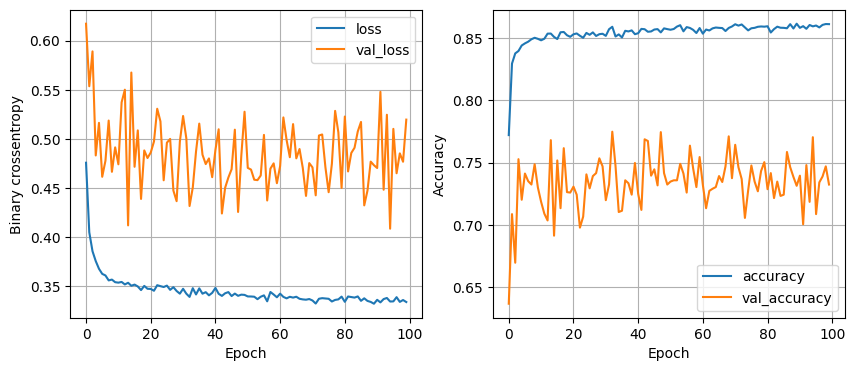

16 nodes, drop 0.2, learning rate 0.005, batch size 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7742 - loss: 0.4735 - val_accuracy: 0.6625 - val_loss: 0.6207
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8164 - loss: 0.4197 - val_accuracy: 0.6954 - val_loss: 0.5753
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8294 - loss: 0.3986 - val_accuracy: 0.7205 - val_loss: 0.5521
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8363 - loss: 0.3857 - val_accuracy: 0.7022 - val_loss: 0.5575
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8401 - loss: 0.3727 - val_accuracy: 0.6805 - val_loss: 0.5713
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8451 - loss: 0.3647 - val_accuracy: 0.7144 - val_loss: 0.5445
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8438 - loss: 0.3661 - val_accuracy: 0.7270 - val_loss: 0.5068
Epoch 8/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1

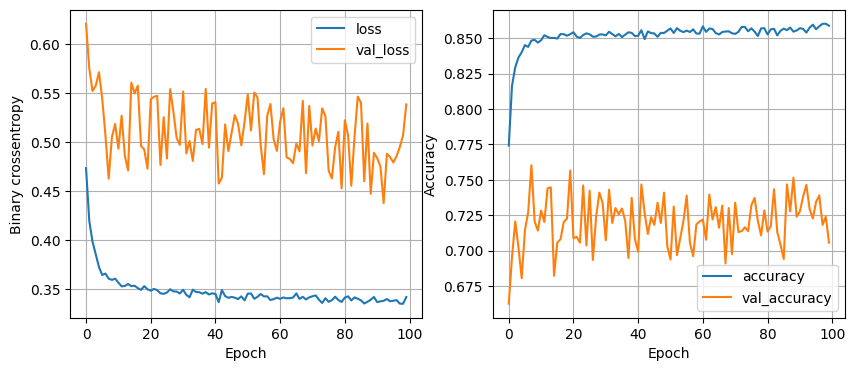

16 nodes, drop 0.2, learning rate 0.005, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7506 - loss: 0.5058 - val_accuracy: 0.6316 - val_loss: 0.6818
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8003 - loss: 0.4347 - val_accuracy: 0.6917 - val_loss: 0.5907
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8125 - loss: 0.4178 - val_accuracy: 0.6666 - val_loss: 0.6219
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8254 - loss: 0.4049 - val_accuracy: 0.6958 - val_loss: 0.5657
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8302 - loss: 0.3931 - val_accuracy: 0.7277 - val_loss: 0.5130
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8348 - loss: 0.3858 - val_accuracy: 0.7165 - val_loss: 0.5553
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8436 - loss: 0.3780 - val_accuracy: 0.7195 - val_loss: 0.5374
Epoch 8/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - ac

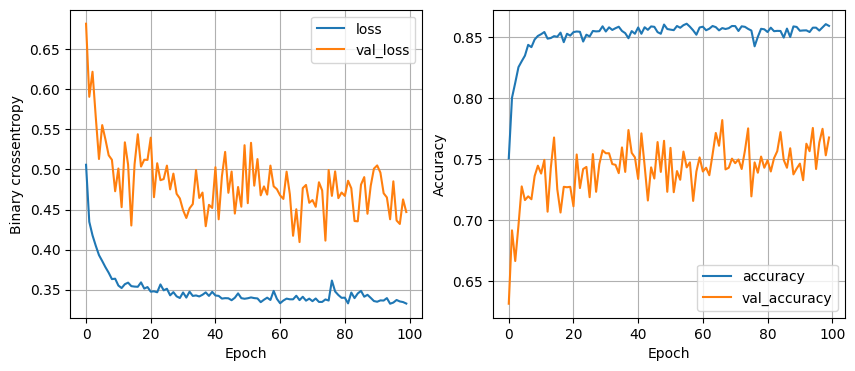

16 nodes, drop 0.2, learning rate 0.001, batch size 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7298 - loss: 0.5687 - val_accuracy: 0.6105 - val_loss: 0.6786
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7928 - loss: 0.4615 - val_accuracy: 0.6472 - val_loss: 0.6149
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8058 - loss: 0.4431 - val_accuracy: 0.6438 - val_loss: 0.6016
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8120 - loss: 0.4312 - val_accuracy: 0.6737 - val_loss: 0.5825
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8146 - loss: 0.4244 - val_accuracy: 0.6866 - val_loss: 0.5766
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8212 - loss: 0.4173 - val_accuracy: 0.6625 - val_loss: 0.5980
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8226 - loss: 0.4076 - val_accuracy: 0.7032 - val_loss: 0.5668
Epoch 8/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1

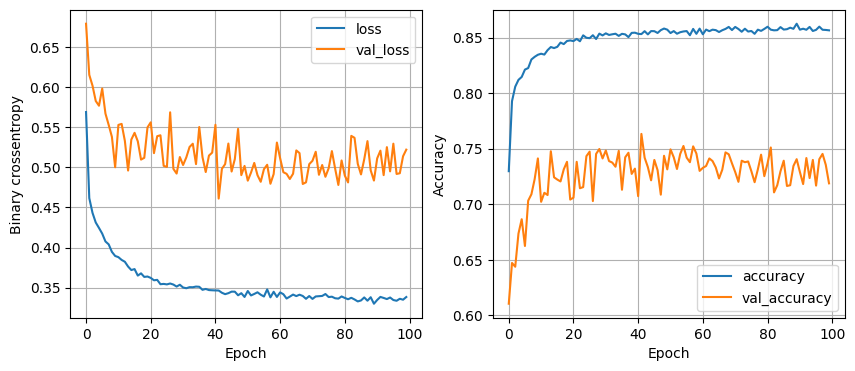

16 nodes, drop 0.2, learning rate 0.001, batch size 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6974 - loss: 0.5733 - val_accuracy: 0.5969 - val_loss: 0.7122
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7749 - loss: 0.4749 - val_accuracy: 0.6367 - val_loss: 0.6344
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7930 - loss: 0.4547 - val_accuracy: 0.6295 - val_loss: 0.6402
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8036 - loss: 0.4393 - val_accuracy: 0.6537 - val_loss: 0.6037
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8146 - loss: 0.4265 - val_accuracy: 0.6666 - val_loss: 0.5950
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8163 - loss: 0.4210 - val_accuracy: 0.6723 - val_loss: 0.5797
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8192 - loss: 0.4131 - val_accuracy: 0.6706 - val_loss: 0.5890
Epoch 8/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1

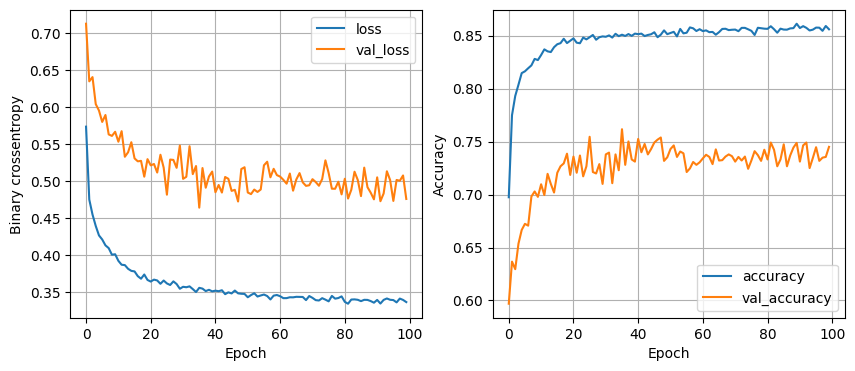

16 nodes, drop 0.2, learning rate 0.001, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6476 - loss: 0.6230 - val_accuracy: 0.4964 - val_loss: 0.7741
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7466 - loss: 0.5156 - val_accuracy: 0.5925 - val_loss: 0.6984
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7694 - loss: 0.4834 - val_accuracy: 0.6041 - val_loss: 0.6811
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7810 - loss: 0.4676 - val_accuracy: 0.6214 - val_loss: 0.6424
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7893 - loss: 0.4539 - val_accuracy: 0.6234 - val_loss: 0.6386
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7911 - loss: 0.4479 - val_accuracy: 0.6194 - val_loss: 0.6410
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7957 - loss: 0.4400 - val_accuracy: 0.6346 - val_loss: 0.6196
Epoch 8/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - ac

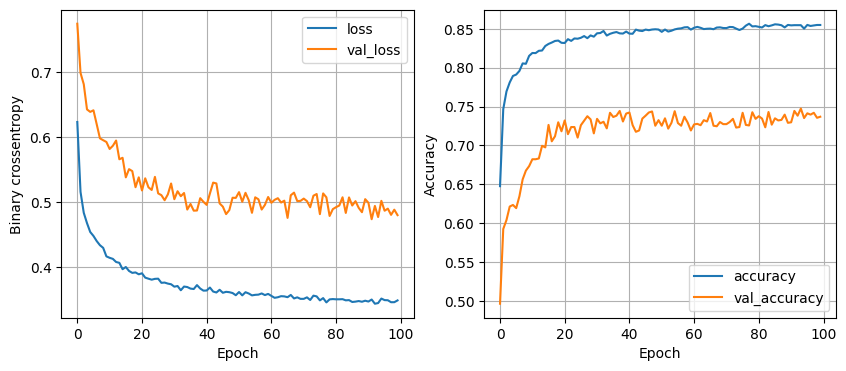

32 nodes, drop 0, learning rate 0.01, batch size 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8260 - loss: 0.3926 - val_accuracy: 0.6659 - val_loss: 0.5524
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8563 - loss: 0.3441 - val_accuracy: 0.7036 - val_loss: 0.5845
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8569 - loss: 0.3386 - val_accuracy: 0.7025 - val_loss: 0.5213
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8599 - loss: 0.3293 - val_accuracy: 0.7555 - val_loss: 0.4693
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8586 - loss: 0.3251 - val_accuracy: 0.7688 - val_loss: 0.4334
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8624 - loss: 0.3231 - val_accuracy: 0.7654 - val_loss: 0.4663
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8628 - loss: 0.3198 - val_accuracy: 0.7891 - val_loss: 0.4121
Epoch 8/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4

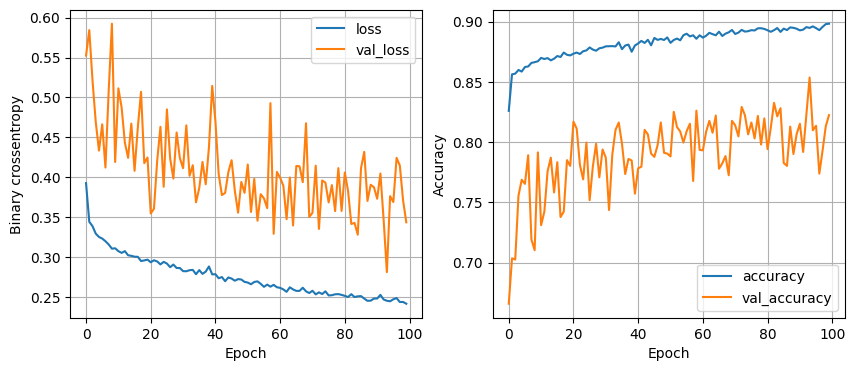

32 nodes, drop 0, learning rate 0.01, batch size 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8195 - loss: 0.4060 - val_accuracy: 0.7212 - val_loss: 0.5228
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8545 - loss: 0.3459 - val_accuracy: 0.7321 - val_loss: 0.4994
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8577 - loss: 0.3335 - val_accuracy: 0.7491 - val_loss: 0.4732
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8628 - loss: 0.3252 - val_accuracy: 0.6720 - val_loss: 0.6172
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8604 - loss: 0.3234 - val_accuracy: 0.7253 - val_loss: 0.5405
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8622 - loss: 0.3204 - val_accuracy: 0.7572 - val_loss: 0.4444
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8637 - loss: 0.3208 - val_accuracy: 0.7056 - val_loss: 0.5568
Epoch 8/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3

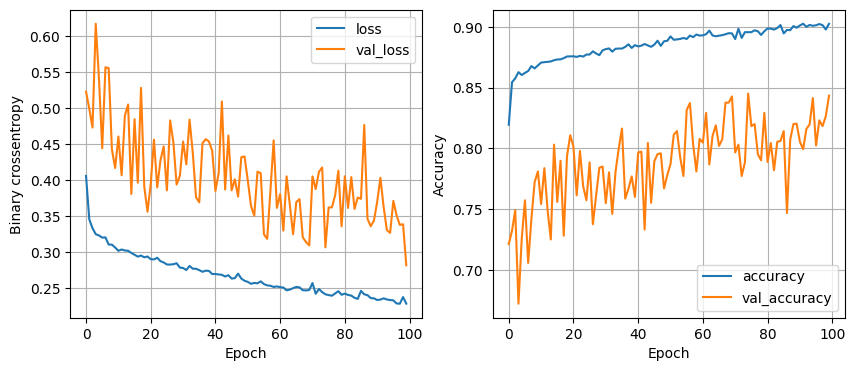

32 nodes, drop 0, learning rate 0.01, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8183 - loss: 0.4091 - val_accuracy: 0.6587 - val_loss: 0.6969
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8547 - loss: 0.3444 - val_accuracy: 0.6530 - val_loss: 0.6410
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8592 - loss: 0.3308 - val_accuracy: 0.7334 - val_loss: 0.5301
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8627 - loss: 0.3252 - val_accuracy: 0.6985 - val_loss: 0.5299
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8616 - loss: 0.3225 - val_accuracy: 0.7470 - val_loss: 0.4620
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8657 - loss: 0.3188 - val_accuracy: 0.7613 - val_loss: 0.4449
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8685 - loss: 0.3101 - val_accuracy: 0.7562 - val_loss: 0.4538
Epoch 8/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accur

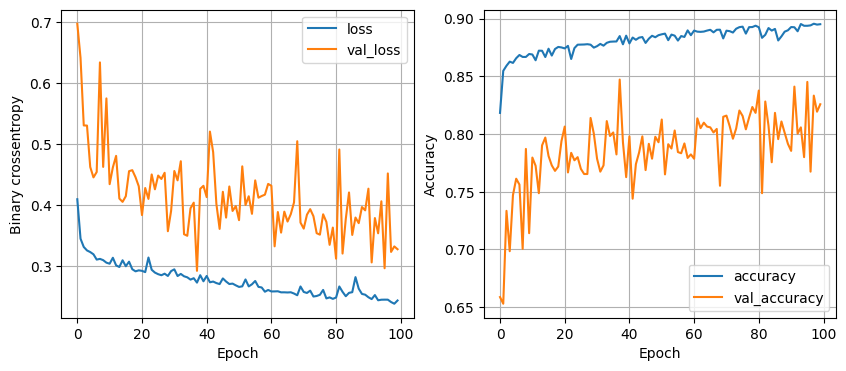

32 nodes, drop 0, learning rate 0.005, batch size 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8231 - loss: 0.3977 - val_accuracy: 0.6859 - val_loss: 0.6028
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8528 - loss: 0.3472 - val_accuracy: 0.6805 - val_loss: 0.6362
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8585 - loss: 0.3357 - val_accuracy: 0.6428 - val_loss: 0.6850
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8603 - loss: 0.3269 - val_accuracy: 0.7548 - val_loss: 0.4705
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8613 - loss: 0.3255 - val_accuracy: 0.7722 - val_loss: 0.4293
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8638 - loss: 0.3195 - val_accuracy: 0.7436 - val_loss: 0.4992
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8647 - loss: 0.3166 - val_accuracy: 0.7851 - val_loss: 0.4130
Epoch 8/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 

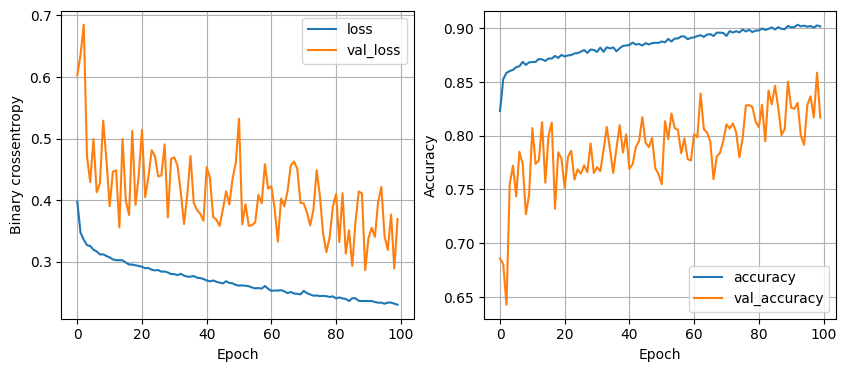

32 nodes, drop 0, learning rate 0.005, batch size 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8159 - loss: 0.4107 - val_accuracy: 0.7396 - val_loss: 0.5375
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8536 - loss: 0.3531 - val_accuracy: 0.7800 - val_loss: 0.4550
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8556 - loss: 0.3396 - val_accuracy: 0.7606 - val_loss: 0.4433
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8618 - loss: 0.3303 - val_accuracy: 0.7990 - val_loss: 0.4018
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8633 - loss: 0.3257 - val_accuracy: 0.7402 - val_loss: 0.4753
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8631 - loss: 0.3209 - val_accuracy: 0.7195 - val_loss: 0.5587
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8662 - loss: 0.3159 - val_accuracy: 0.7134 - val_loss: 0.5383
Epoch 8/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 

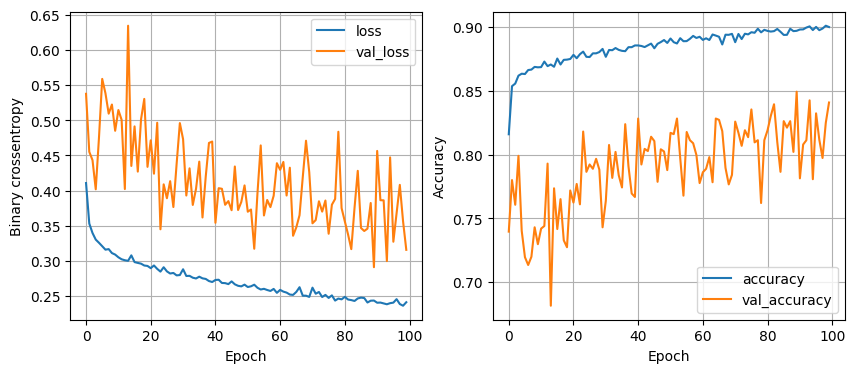

32 nodes, drop 0, learning rate 0.005, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7979 - loss: 0.4438 - val_accuracy: 0.7070 - val_loss: 0.5078
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8395 - loss: 0.3715 - val_accuracy: 0.7660 - val_loss: 0.4785
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8528 - loss: 0.3519 - val_accuracy: 0.7980 - val_loss: 0.4285
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8541 - loss: 0.3443 - val_accuracy: 0.7233 - val_loss: 0.5243
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8597 - loss: 0.3324 - val_accuracy: 0.7450 - val_loss: 0.5010
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8598 - loss: 0.3274 - val_accuracy: 0.7929 - val_loss: 0.3980
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8614 - loss: 0.3252 - val_accuracy: 0.7165 - val_loss: 0.5498
Epoch 8/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accu

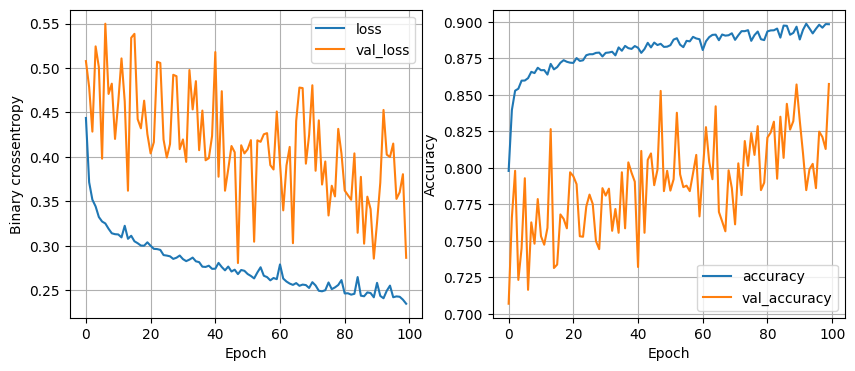

32 nodes, drop 0, learning rate 0.001, batch size 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7954 - loss: 0.4500 - val_accuracy: 0.6292 - val_loss: 0.6595
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8402 - loss: 0.3732 - val_accuracy: 0.7273 - val_loss: 0.5573
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8491 - loss: 0.3552 - val_accuracy: 0.7301 - val_loss: 0.5505
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8564 - loss: 0.3451 - val_accuracy: 0.7898 - val_loss: 0.4305
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8592 - loss: 0.3388 - val_accuracy: 0.7552 - val_loss: 0.5038
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8592 - loss: 0.3332 - val_accuracy: 0.7871 - val_loss: 0.4238
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8620 - loss: 0.3281 - val_accuracy: 0.7460 - val_loss: 0.5264
Epoch 8/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 

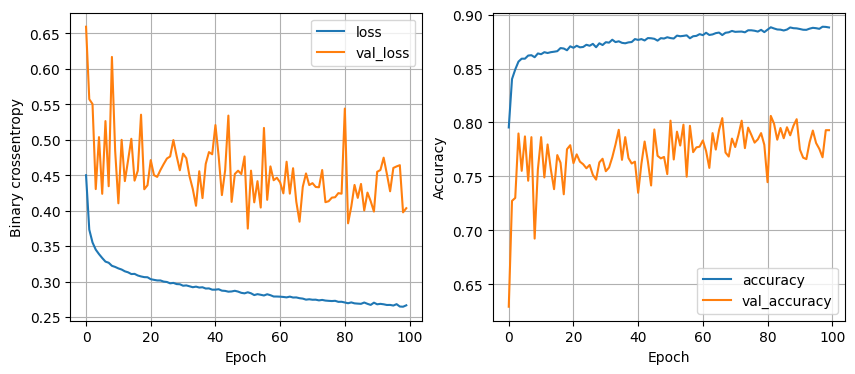

32 nodes, drop 0, learning rate 0.001, batch size 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7546 - loss: 0.5118 - val_accuracy: 0.6587 - val_loss: 0.6026
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8170 - loss: 0.4024 - val_accuracy: 0.6822 - val_loss: 0.5655
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8334 - loss: 0.3778 - val_accuracy: 0.7025 - val_loss: 0.5608
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8463 - loss: 0.3621 - val_accuracy: 0.6676 - val_loss: 0.6372
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8512 - loss: 0.3519 - val_accuracy: 0.7002 - val_loss: 0.5863
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8564 - loss: 0.3453 - val_accuracy: 0.7131 - val_loss: 0.5889
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8589 - loss: 0.3401 - val_accuracy: 0.7565 - val_loss: 0.4783
Epoch 8/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 

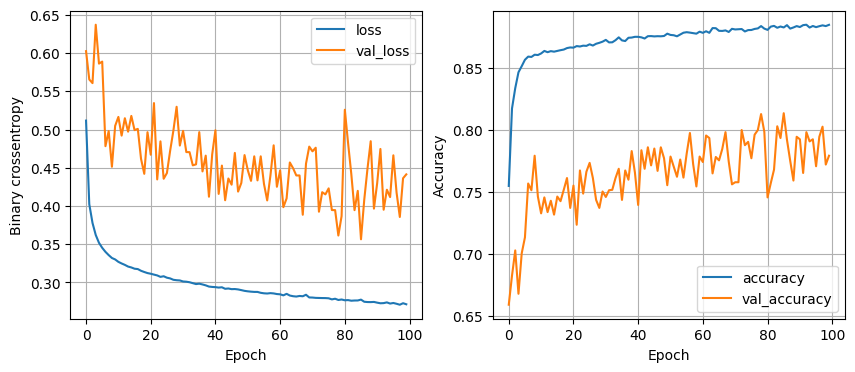

32 nodes, drop 0, learning rate 0.001, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7368 - loss: 0.5437 - val_accuracy: 0.6211 - val_loss: 0.6657
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8074 - loss: 0.4206 - val_accuracy: 0.6635 - val_loss: 0.6234
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8300 - loss: 0.3926 - val_accuracy: 0.7032 - val_loss: 0.5770
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8393 - loss: 0.3774 - val_accuracy: 0.7294 - val_loss: 0.5349
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8447 - loss: 0.3678 - val_accuracy: 0.7409 - val_loss: 0.5220
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8496 - loss: 0.3610 - val_accuracy: 0.7063 - val_loss: 0.5666
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8508 - loss: 0.3564 - val_accuracy: 0.7154 - val_loss: 0.5633
Epoch 8/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accu

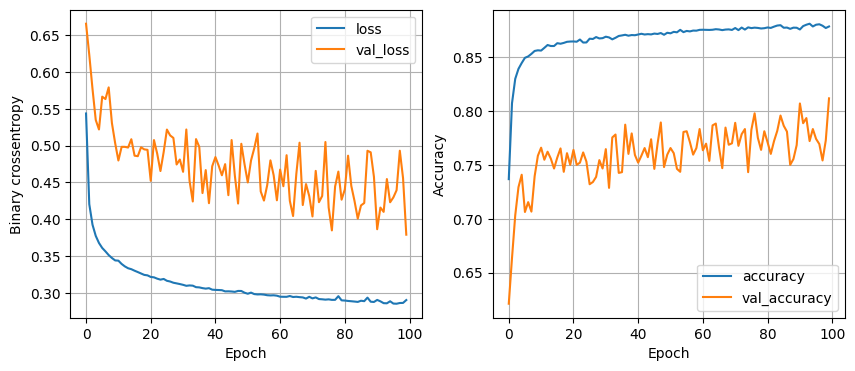

32 nodes, drop 0.2, learning rate 0.01, batch size 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8097 - loss: 0.4347 - val_accuracy: 0.7423 - val_loss: 0.4905
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8416 - loss: 0.3726 - val_accuracy: 0.6774 - val_loss: 0.5982
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8438 - loss: 0.3676 - val_accuracy: 0.6472 - val_loss: 0.7151
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8500 - loss: 0.3611 - val_accuracy: 0.7504 - val_loss: 0.4713
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8456 - loss: 0.3591 - val_accuracy: 0.7185 - val_loss: 0.4923
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8493 - loss: 0.3538 - val_accuracy: 0.7735 - val_loss: 0.4451
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8533 - loss: 0.3547 - val_accuracy: 0.7311 - val_loss: 0.4586
Epoch 8/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s

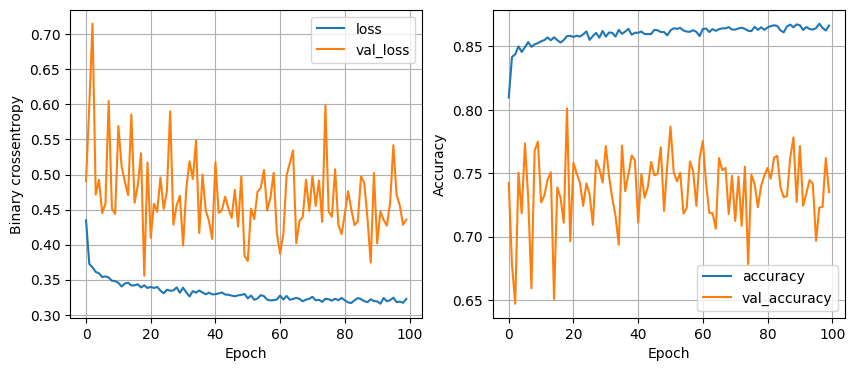

32 nodes, drop 0.2, learning rate 0.01, batch size 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8023 - loss: 0.4367 - val_accuracy: 0.7728 - val_loss: 0.4805
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8372 - loss: 0.3780 - val_accuracy: 0.7273 - val_loss: 0.5412
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8449 - loss: 0.3683 - val_accuracy: 0.7358 - val_loss: 0.4990
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8508 - loss: 0.3562 - val_accuracy: 0.7093 - val_loss: 0.5242
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8508 - loss: 0.3506 - val_accuracy: 0.7732 - val_loss: 0.4283
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8521 - loss: 0.3510 - val_accuracy: 0.7569 - val_loss: 0.4419
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8527 - loss: 0.3490 - val_accuracy: 0.7049 - val_loss: 0.5007
Epoch 8/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s

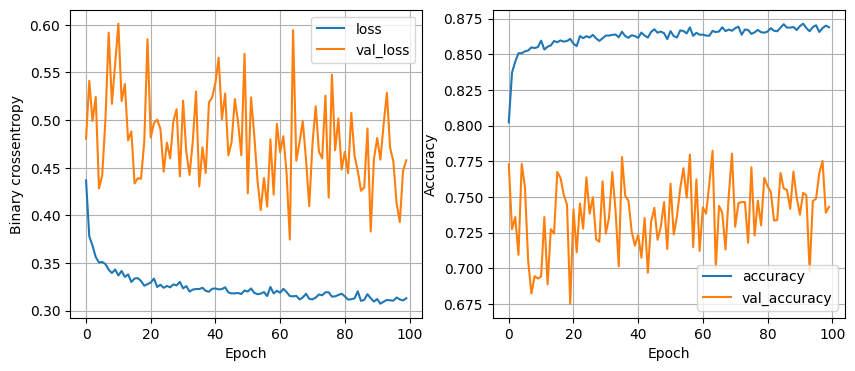

32 nodes, drop 0.2, learning rate 0.01, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7912 - loss: 0.4542 - val_accuracy: 0.7100 - val_loss: 0.5761
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8367 - loss: 0.3833 - val_accuracy: 0.7399 - val_loss: 0.5346
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8446 - loss: 0.3702 - val_accuracy: 0.7674 - val_loss: 0.4455
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8493 - loss: 0.3541 - val_accuracy: 0.7355 - val_loss: 0.5239
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8527 - loss: 0.3497 - val_accuracy: 0.7301 - val_loss: 0.5611
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8550 - loss: 0.3465 - val_accuracy: 0.7756 - val_loss: 0.4249
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8558 - loss: 0.3448 - val_accuracy: 0.7019 - val_loss: 0.5294
Epoch 8/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc

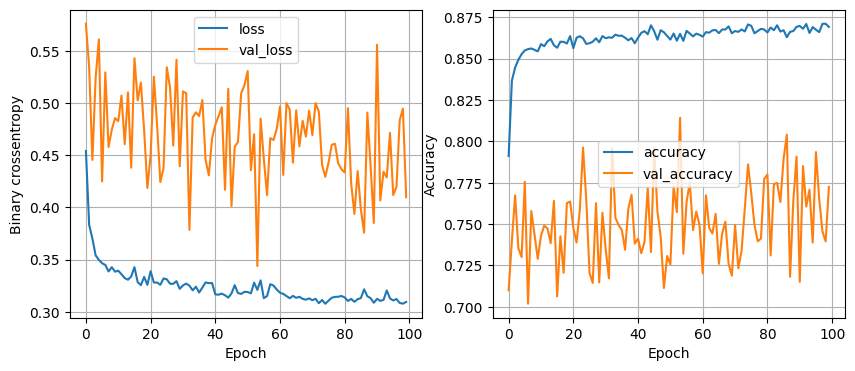

32 nodes, drop 0.2, learning rate 0.005, batch size 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8045 - loss: 0.4351 - val_accuracy: 0.6971 - val_loss: 0.5455
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8365 - loss: 0.3871 - val_accuracy: 0.7701 - val_loss: 0.4542
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8440 - loss: 0.3662 - val_accuracy: 0.7216 - val_loss: 0.5278
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8499 - loss: 0.3564 - val_accuracy: 0.7039 - val_loss: 0.5450
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8525 - loss: 0.3507 - val_accuracy: 0.7477 - val_loss: 0.4731
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8547 - loss: 0.3465 - val_accuracy: 0.6930 - val_loss: 0.5521
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8536 - loss: 0.3441 - val_accuracy: 0.6815 - val_loss: 0.6087
Epoch 8/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1

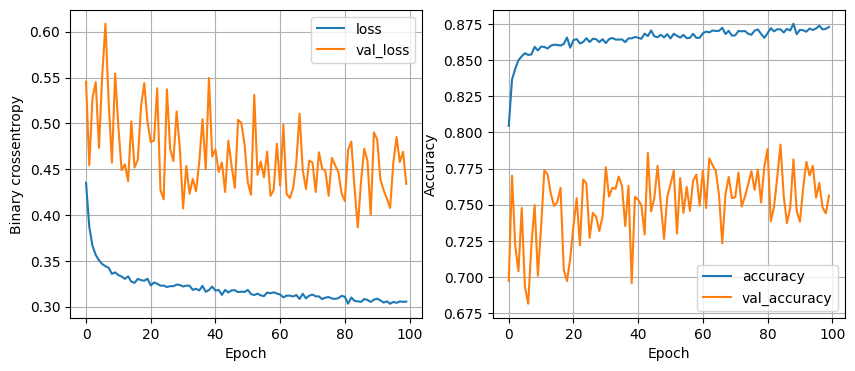

32 nodes, drop 0.2, learning rate 0.005, batch size 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7940 - loss: 0.4474 - val_accuracy: 0.6244 - val_loss: 0.6216
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8305 - loss: 0.3931 - val_accuracy: 0.7328 - val_loss: 0.4960
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8412 - loss: 0.3719 - val_accuracy: 0.7946 - val_loss: 0.4130
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8500 - loss: 0.3546 - val_accuracy: 0.7243 - val_loss: 0.5482
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8511 - loss: 0.3530 - val_accuracy: 0.7626 - val_loss: 0.4328
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8525 - loss: 0.3470 - val_accuracy: 0.7321 - val_loss: 0.5014
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8551 - loss: 0.3386 - val_accuracy: 0.7348 - val_loss: 0.5103
Epoch 8/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1

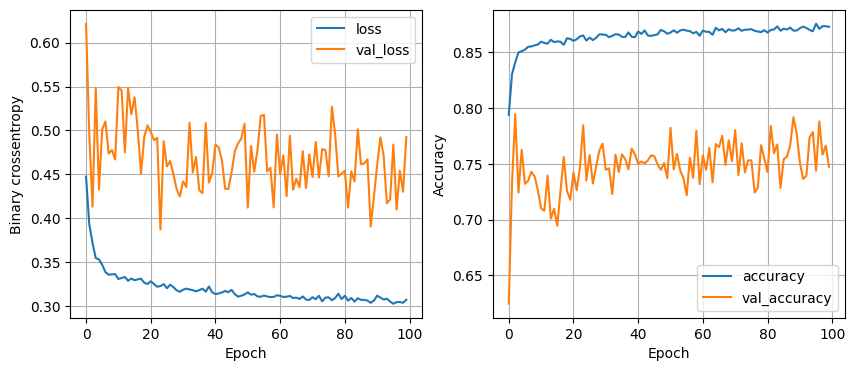

32 nodes, drop 0.2, learning rate 0.005, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7864 - loss: 0.4655 - val_accuracy: 0.6764 - val_loss: 0.6013
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8243 - loss: 0.4014 - val_accuracy: 0.6839 - val_loss: 0.5824
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8391 - loss: 0.3806 - val_accuracy: 0.7270 - val_loss: 0.5172
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8423 - loss: 0.3703 - val_accuracy: 0.7304 - val_loss: 0.4869
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8496 - loss: 0.3580 - val_accuracy: 0.6835 - val_loss: 0.5827
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8377 - loss: 0.3735 - val_accuracy: 0.7460 - val_loss: 0.5207
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8467 - loss: 0.3574 - val_accuracy: 0.6978 - val_loss: 0.5943
Epoch 8/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - ac

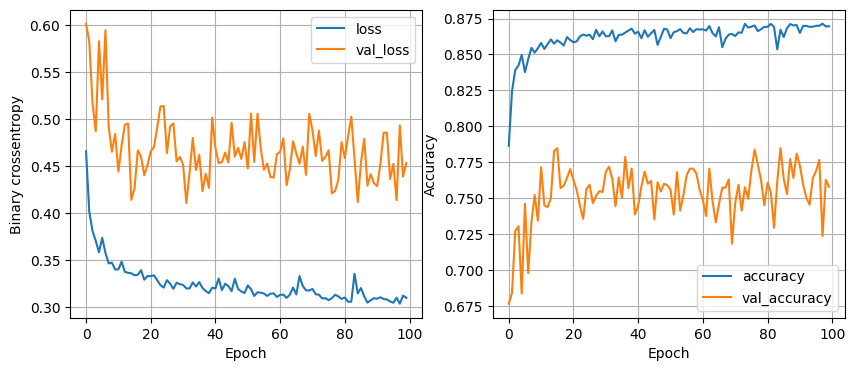

32 nodes, drop 0.2, learning rate 0.001, batch size 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7674 - loss: 0.4913 - val_accuracy: 0.6078 - val_loss: 0.6474
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8004 - loss: 0.4297 - val_accuracy: 0.6550 - val_loss: 0.6180
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8145 - loss: 0.4140 - val_accuracy: 0.7114 - val_loss: 0.5642
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8293 - loss: 0.3953 - val_accuracy: 0.6958 - val_loss: 0.6023
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8315 - loss: 0.3895 - val_accuracy: 0.7477 - val_loss: 0.5169
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8409 - loss: 0.3746 - val_accuracy: 0.7582 - val_loss: 0.5076
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8398 - loss: 0.3722 - val_accuracy: 0.7280 - val_loss: 0.5573
Epoch 8/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1

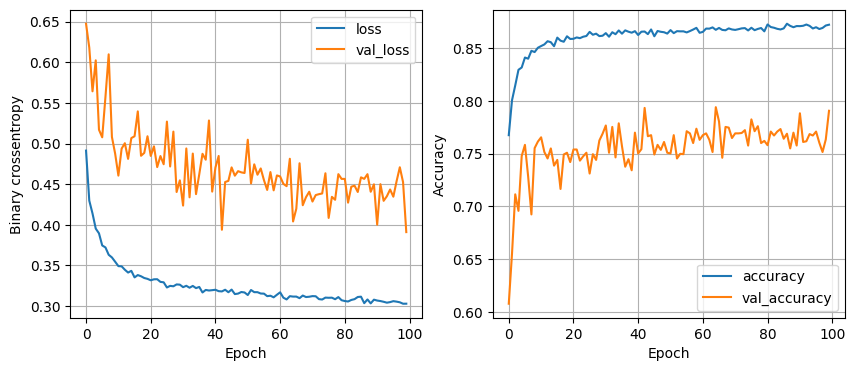

32 nodes, drop 0.2, learning rate 0.001, batch size 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7069 - loss: 0.5591 - val_accuracy: 0.6160 - val_loss: 0.6536
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7959 - loss: 0.4484 - val_accuracy: 0.6200 - val_loss: 0.6743
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8079 - loss: 0.4292 - val_accuracy: 0.6452 - val_loss: 0.6139
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8132 - loss: 0.4151 - val_accuracy: 0.6357 - val_loss: 0.6380
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8201 - loss: 0.4044 - val_accuracy: 0.6852 - val_loss: 0.5761
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8293 - loss: 0.3944 - val_accuracy: 0.6842 - val_loss: 0.5911
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8340 - loss: 0.3858 - val_accuracy: 0.6913 - val_loss: 0.5904
Epoch 8/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1

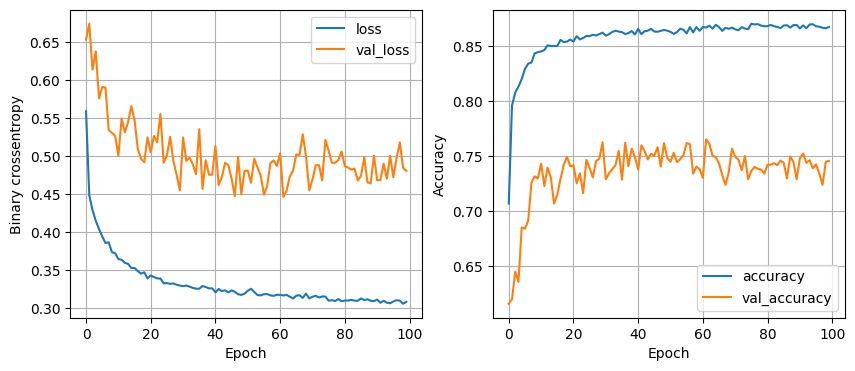

32 nodes, drop 0.2, learning rate 0.001, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7155 - loss: 0.5743 - val_accuracy: 0.5477 - val_loss: 0.7538
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7856 - loss: 0.4614 - val_accuracy: 0.6340 - val_loss: 0.6383
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8005 - loss: 0.4316 - val_accuracy: 0.6333 - val_loss: 0.6349
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8090 - loss: 0.4243 - val_accuracy: 0.6404 - val_loss: 0.6263
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8137 - loss: 0.4165 - val_accuracy: 0.6737 - val_loss: 0.5751
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8195 - loss: 0.4070 - val_accuracy: 0.6737 - val_loss: 0.5844
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8206 - loss: 0.4035 - val_accuracy: 0.6611 - val_loss: 0.6084
Epoch 8/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - ac

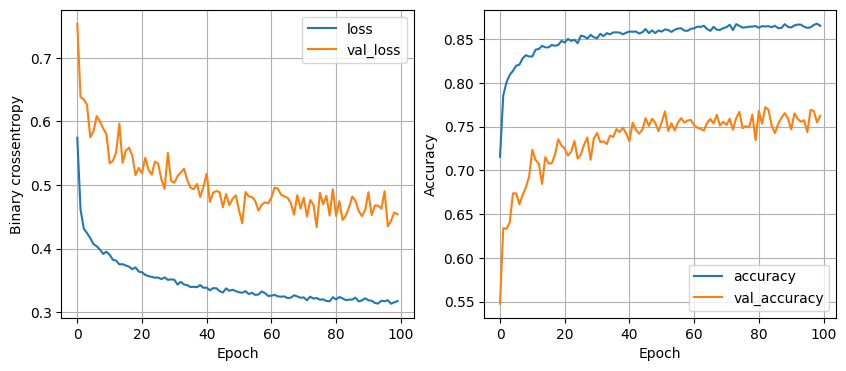

64 nodes, drop 0, learning rate 0.01, batch size 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8312 - loss: 0.3864 - val_accuracy: 0.7219 - val_loss: 0.5772
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8493 - loss: 0.3487 - val_accuracy: 0.7430 - val_loss: 0.4616
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8536 - loss: 0.3374 - val_accuracy: 0.7049 - val_loss: 0.5608
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8597 - loss: 0.3284 - val_accuracy: 0.6326 - val_loss: 0.7277
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8615 - loss: 0.3283 - val_accuracy: 0.8065 - val_loss: 0.3389
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8665 - loss: 0.3161 - val_accuracy: 0.7935 - val_loss: 0.3764
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8649 - loss: 0.3160 - val_accuracy: 0.7837 - val_loss: 0.4205
Epoch 8/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3

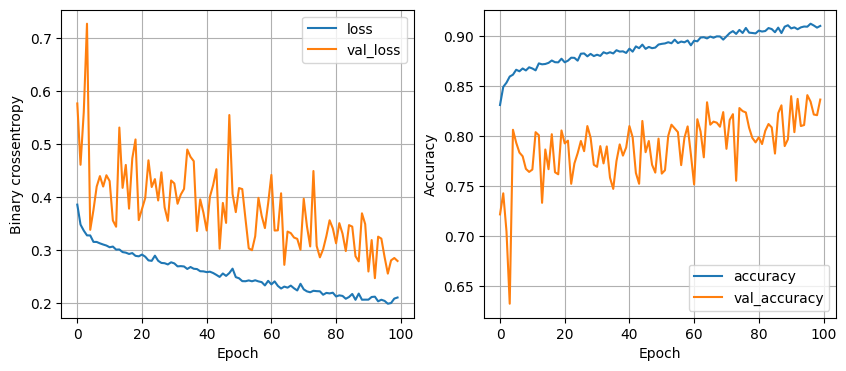

64 nodes, drop 0, learning rate 0.01, batch size 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8305 - loss: 0.3841 - val_accuracy: 0.6795 - val_loss: 0.5851
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8542 - loss: 0.3476 - val_accuracy: 0.6716 - val_loss: 0.6513
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8592 - loss: 0.3323 - val_accuracy: 0.7222 - val_loss: 0.4914
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8633 - loss: 0.3247 - val_accuracy: 0.7338 - val_loss: 0.4661
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8589 - loss: 0.3321 - val_accuracy: 0.7759 - val_loss: 0.4540
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8632 - loss: 0.3183 - val_accuracy: 0.7250 - val_loss: 0.5387
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8671 - loss: 0.3136 - val_accuracy: 0.7104 - val_loss: 0.5686
Epoch 8/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 

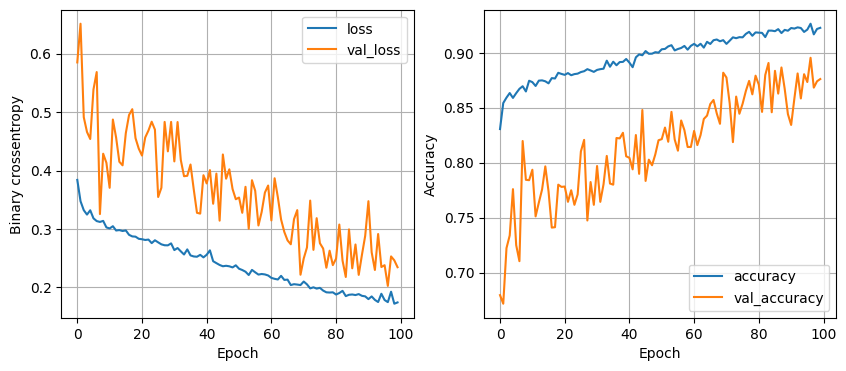

64 nodes, drop 0, learning rate 0.01, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8286 - loss: 0.3954 - val_accuracy: 0.7083 - val_loss: 0.6064
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8529 - loss: 0.3459 - val_accuracy: 0.6615 - val_loss: 0.6186
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8568 - loss: 0.3339 - val_accuracy: 0.7474 - val_loss: 0.4934
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8588 - loss: 0.3309 - val_accuracy: 0.7772 - val_loss: 0.4405
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8615 - loss: 0.3214 - val_accuracy: 0.7742 - val_loss: 0.4215
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8676 - loss: 0.3146 - val_accuracy: 0.7542 - val_loss: 0.4800
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8672 - loss: 0.3124 - val_accuracy: 0.7823 - val_loss: 0.3752
Epoch 8/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accur

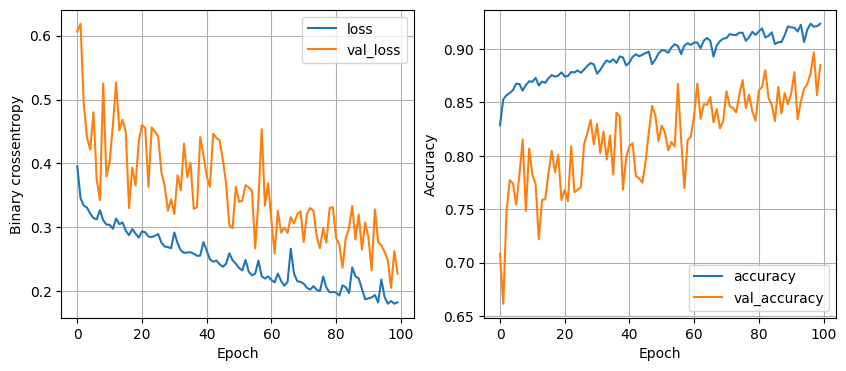

64 nodes, drop 0, learning rate 0.005, batch size 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8311 - loss: 0.3888 - val_accuracy: 0.7603 - val_loss: 0.4441
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8572 - loss: 0.3417 - val_accuracy: 0.7049 - val_loss: 0.5710
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8592 - loss: 0.3338 - val_accuracy: 0.7667 - val_loss: 0.4633
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8647 - loss: 0.3245 - val_accuracy: 0.8051 - val_loss: 0.3708
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8650 - loss: 0.3197 - val_accuracy: 0.7626 - val_loss: 0.4747
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8673 - loss: 0.3141 - val_accuracy: 0.7997 - val_loss: 0.3774
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8655 - loss: 0.3134 - val_accuracy: 0.7708 - val_loss: 0.4981
Epoch 8/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 

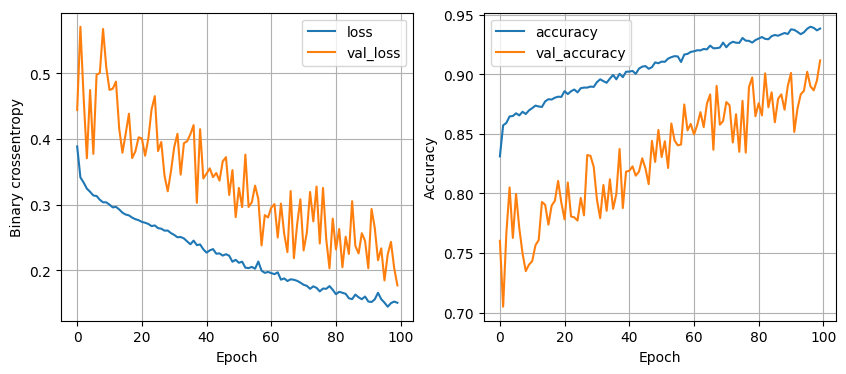

64 nodes, drop 0, learning rate 0.005, batch size 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8260 - loss: 0.4008 - val_accuracy: 0.7199 - val_loss: 0.5791
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8546 - loss: 0.3468 - val_accuracy: 0.6560 - val_loss: 0.6997
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8558 - loss: 0.3351 - val_accuracy: 0.7222 - val_loss: 0.5386
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8605 - loss: 0.3259 - val_accuracy: 0.7559 - val_loss: 0.4783
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8654 - loss: 0.3179 - val_accuracy: 0.7817 - val_loss: 0.4424
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8687 - loss: 0.3110 - val_accuracy: 0.7667 - val_loss: 0.4582
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8663 - loss: 0.3135 - val_accuracy: 0.7171 - val_loss: 0.5786
Epoch 8/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 

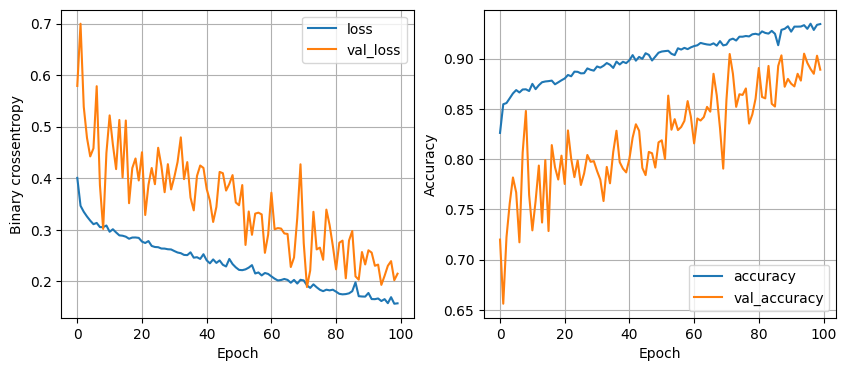

64 nodes, drop 0, learning rate 0.005, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8097 - loss: 0.4210 - val_accuracy: 0.6411 - val_loss: 0.6543
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8473 - loss: 0.3611 - val_accuracy: 0.7049 - val_loss: 0.6106
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8577 - loss: 0.3387 - val_accuracy: 0.7772 - val_loss: 0.4507
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8595 - loss: 0.3317 - val_accuracy: 0.7453 - val_loss: 0.5038
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8618 - loss: 0.3216 - val_accuracy: 0.7185 - val_loss: 0.5067
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8605 - loss: 0.3273 - val_accuracy: 0.7827 - val_loss: 0.4234
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8625 - loss: 0.3244 - val_accuracy: 0.7311 - val_loss: 0.5297
Epoch 8/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accu

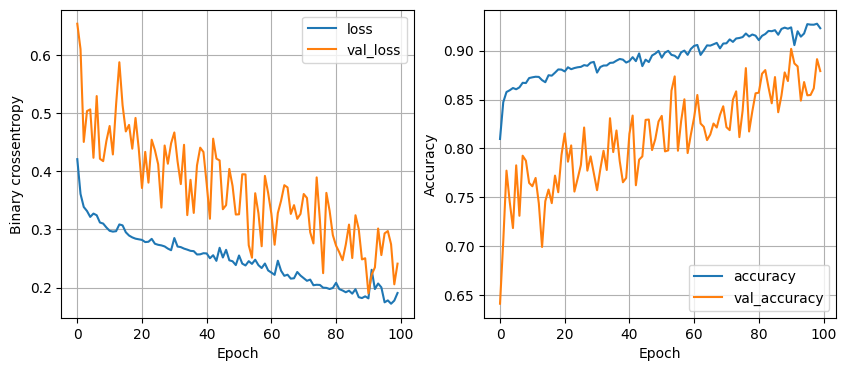

64 nodes, drop 0, learning rate 0.001, batch size 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8076 - loss: 0.4281 - val_accuracy: 0.6920 - val_loss: 0.5881
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8493 - loss: 0.3592 - val_accuracy: 0.7535 - val_loss: 0.4946
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8559 - loss: 0.3424 - val_accuracy: 0.7657 - val_loss: 0.4733
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8573 - loss: 0.3352 - val_accuracy: 0.7905 - val_loss: 0.4383
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8627 - loss: 0.3272 - val_accuracy: 0.7518 - val_loss: 0.4990
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8625 - loss: 0.3226 - val_accuracy: 0.7253 - val_loss: 0.5254
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8642 - loss: 0.3174 - val_accuracy: 0.7416 - val_loss: 0.5105
Epoch 8/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 

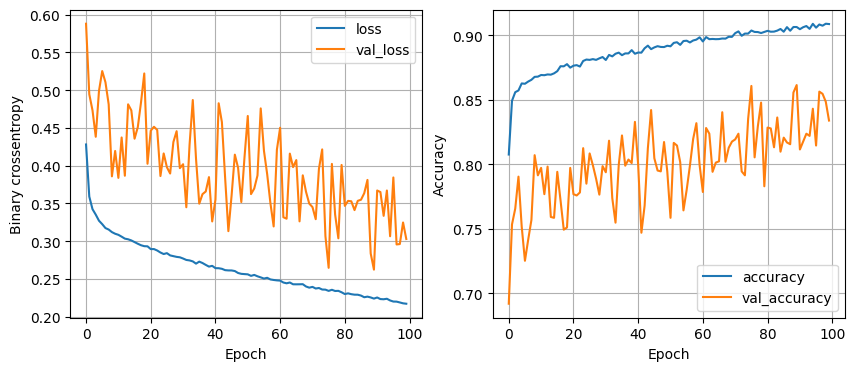

64 nodes, drop 0, learning rate 0.001, batch size 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7947 - loss: 0.4441 - val_accuracy: 0.7294 - val_loss: 0.5276
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8472 - loss: 0.3679 - val_accuracy: 0.7606 - val_loss: 0.4905
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8561 - loss: 0.3504 - val_accuracy: 0.7348 - val_loss: 0.5579
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8586 - loss: 0.3399 - val_accuracy: 0.7548 - val_loss: 0.5051
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8589 - loss: 0.3340 - val_accuracy: 0.7511 - val_loss: 0.4869
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8616 - loss: 0.3287 - val_accuracy: 0.7256 - val_loss: 0.5489
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8631 - loss: 0.3255 - val_accuracy: 0.7290 - val_loss: 0.5531
Epoch 8/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 

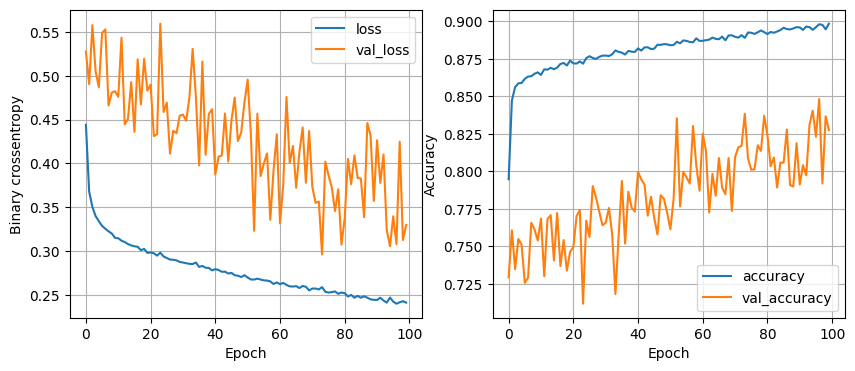

64 nodes, drop 0, learning rate 0.001, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7643 - loss: 0.5026 - val_accuracy: 0.6384 - val_loss: 0.6424
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8277 - loss: 0.3936 - val_accuracy: 0.7243 - val_loss: 0.5256
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8396 - loss: 0.3732 - val_accuracy: 0.7229 - val_loss: 0.5299
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8455 - loss: 0.3599 - val_accuracy: 0.7375 - val_loss: 0.5184
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8485 - loss: 0.3529 - val_accuracy: 0.7385 - val_loss: 0.5222
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8555 - loss: 0.3463 - val_accuracy: 0.7772 - val_loss: 0.4642
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8558 - loss: 0.3401 - val_accuracy: 0.7233 - val_loss: 0.5563
Epoch 8/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accu

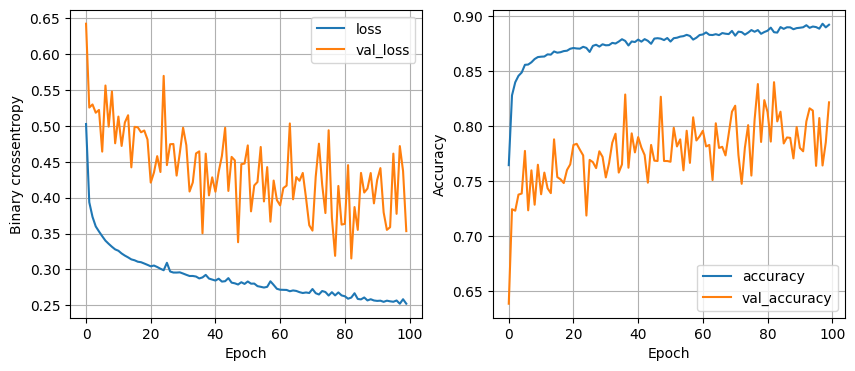

64 nodes, drop 0.2, learning rate 0.01, batch size 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8249 - loss: 0.4073 - val_accuracy: 0.7830 - val_loss: 0.4414
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8442 - loss: 0.3666 - val_accuracy: 0.7277 - val_loss: 0.5184
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8508 - loss: 0.3582 - val_accuracy: 0.7005 - val_loss: 0.5139
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8525 - loss: 0.3490 - val_accuracy: 0.7355 - val_loss: 0.4684
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8485 - loss: 0.3431 - val_accuracy: 0.7301 - val_loss: 0.4708
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8527 - loss: 0.3429 - val_accuracy: 0.6363 - val_loss: 0.6064
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8569 - loss: 0.3403 - val_accuracy: 0.6869 - val_loss: 0.5830
Epoch 8/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s

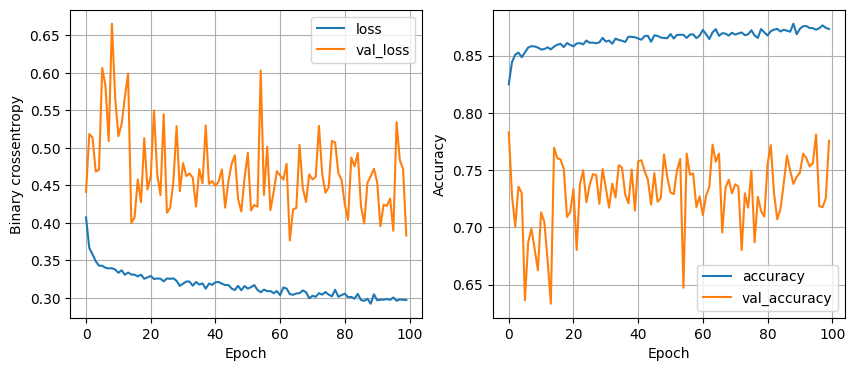

64 nodes, drop 0.2, learning rate 0.01, batch size 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8192 - loss: 0.4117 - val_accuracy: 0.7474 - val_loss: 0.4862
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8418 - loss: 0.3683 - val_accuracy: 0.8217 - val_loss: 0.3944
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8500 - loss: 0.3565 - val_accuracy: 0.6846 - val_loss: 0.5458
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8528 - loss: 0.3456 - val_accuracy: 0.6883 - val_loss: 0.5590
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8491 - loss: 0.3475 - val_accuracy: 0.7267 - val_loss: 0.5852
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8575 - loss: 0.3356 - val_accuracy: 0.7440 - val_loss: 0.5090
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8578 - loss: 0.3350 - val_accuracy: 0.7392 - val_loss: 0.4960
Epoch 8/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s

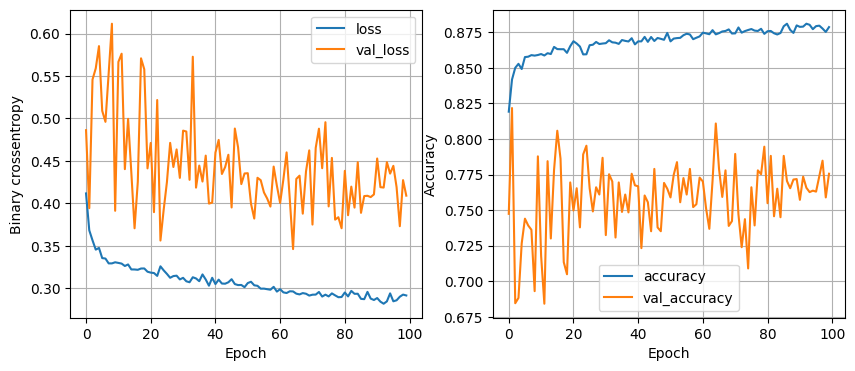

64 nodes, drop 0.2, learning rate 0.01, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8058 - loss: 0.4318 - val_accuracy: 0.6146 - val_loss: 0.6617
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8370 - loss: 0.3777 - val_accuracy: 0.6370 - val_loss: 0.6601
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8480 - loss: 0.3582 - val_accuracy: 0.7256 - val_loss: 0.5745
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8549 - loss: 0.3434 - val_accuracy: 0.6978 - val_loss: 0.5708
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8540 - loss: 0.3367 - val_accuracy: 0.7643 - val_loss: 0.4528
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8518 - loss: 0.3462 - val_accuracy: 0.7260 - val_loss: 0.5326
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8558 - loss: 0.3377 - val_accuracy: 0.7525 - val_loss: 0.4626
Epoch 8/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc

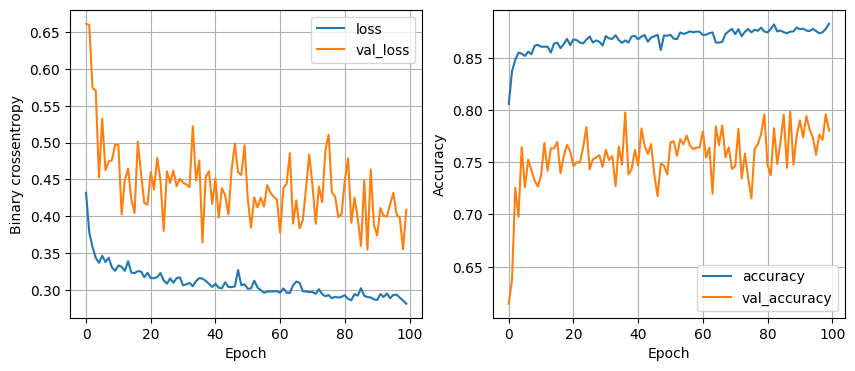

64 nodes, drop 0.2, learning rate 0.005, batch size 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8159 - loss: 0.4163 - val_accuracy: 0.7222 - val_loss: 0.5416
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8440 - loss: 0.3655 - val_accuracy: 0.7484 - val_loss: 0.4954
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8500 - loss: 0.3503 - val_accuracy: 0.7783 - val_loss: 0.4275
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8552 - loss: 0.3454 - val_accuracy: 0.7168 - val_loss: 0.5375
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8561 - loss: 0.3440 - val_accuracy: 0.6934 - val_loss: 0.5725
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8588 - loss: 0.3366 - val_accuracy: 0.6927 - val_loss: 0.5041
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8575 - loss: 0.3346 - val_accuracy: 0.7270 - val_loss: 0.4812
Epoch 8/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1

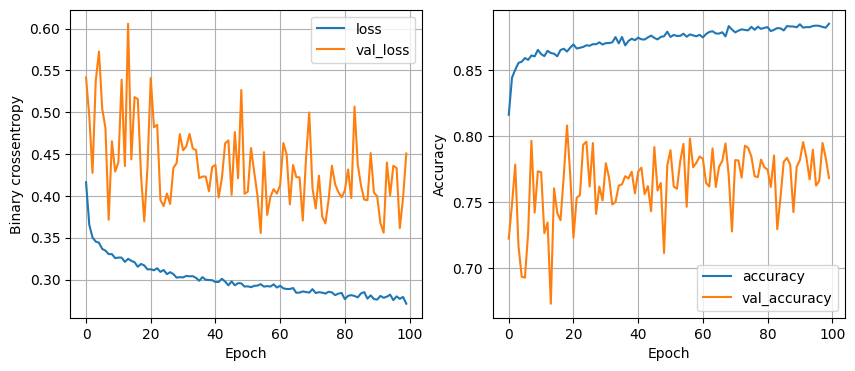

64 nodes, drop 0.2, learning rate 0.005, batch size 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8085 - loss: 0.4253 - val_accuracy: 0.7487 - val_loss: 0.5332
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8434 - loss: 0.3681 - val_accuracy: 0.7504 - val_loss: 0.4974
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8476 - loss: 0.3534 - val_accuracy: 0.6798 - val_loss: 0.5816
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8560 - loss: 0.3433 - val_accuracy: 0.6733 - val_loss: 0.5702
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8559 - loss: 0.3391 - val_accuracy: 0.7606 - val_loss: 0.4681
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8577 - loss: 0.3364 - val_accuracy: 0.7599 - val_loss: 0.4739
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8581 - loss: 0.3296 - val_accuracy: 0.7355 - val_loss: 0.5112
Epoch 8/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1

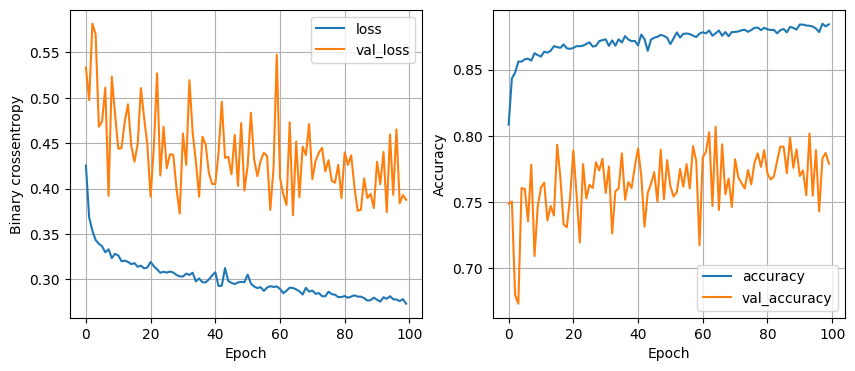

64 nodes, drop 0.2, learning rate 0.005, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8015 - loss: 0.4369 - val_accuracy: 0.6978 - val_loss: 0.5844
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8395 - loss: 0.3760 - val_accuracy: 0.7457 - val_loss: 0.5144
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8451 - loss: 0.3594 - val_accuracy: 0.7080 - val_loss: 0.5473
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8523 - loss: 0.3509 - val_accuracy: 0.7844 - val_loss: 0.4407
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8541 - loss: 0.3412 - val_accuracy: 0.6907 - val_loss: 0.5701
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8564 - loss: 0.3365 - val_accuracy: 0.7178 - val_loss: 0.5340
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8631 - loss: 0.3271 - val_accuracy: 0.7474 - val_loss: 0.4860
Epoch 8/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - ac

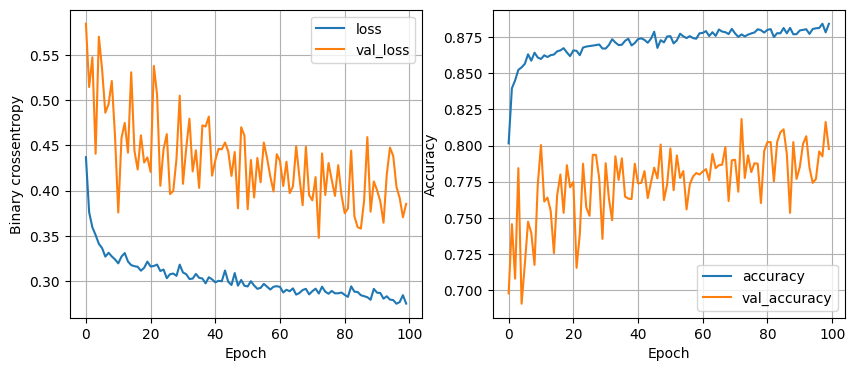

64 nodes, drop 0.2, learning rate 0.001, batch size 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7872 - loss: 0.4664 - val_accuracy: 0.6486 - val_loss: 0.6030
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8289 - loss: 0.3985 - val_accuracy: 0.7161 - val_loss: 0.5438
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8377 - loss: 0.3805 - val_accuracy: 0.6866 - val_loss: 0.6272
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8429 - loss: 0.3673 - val_accuracy: 0.7514 - val_loss: 0.5104
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8480 - loss: 0.3589 - val_accuracy: 0.7708 - val_loss: 0.4673
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8498 - loss: 0.3514 - val_accuracy: 0.7433 - val_loss: 0.5199
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8578 - loss: 0.3450 - val_accuracy: 0.7586 - val_loss: 0.4607
Epoch 8/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1

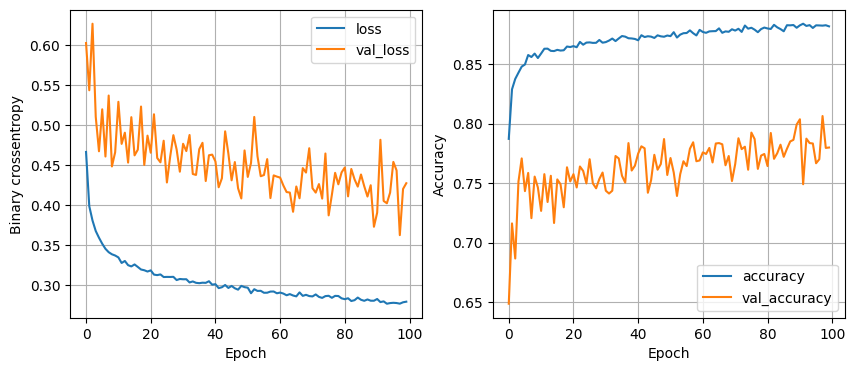

64 nodes, drop 0.2, learning rate 0.001, batch size 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7794 - loss: 0.4715 - val_accuracy: 0.6312 - val_loss: 0.6867
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8192 - loss: 0.4059 - val_accuracy: 0.7121 - val_loss: 0.5568
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8325 - loss: 0.3886 - val_accuracy: 0.6822 - val_loss: 0.5904
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8415 - loss: 0.3763 - val_accuracy: 0.7093 - val_loss: 0.5565
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8464 - loss: 0.3663 - val_accuracy: 0.7341 - val_loss: 0.5199
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8505 - loss: 0.3591 - val_accuracy: 0.7246 - val_loss: 0.5520
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8484 - loss: 0.3578 - val_accuracy: 0.7273 - val_loss: 0.5524
Epoch 8/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1

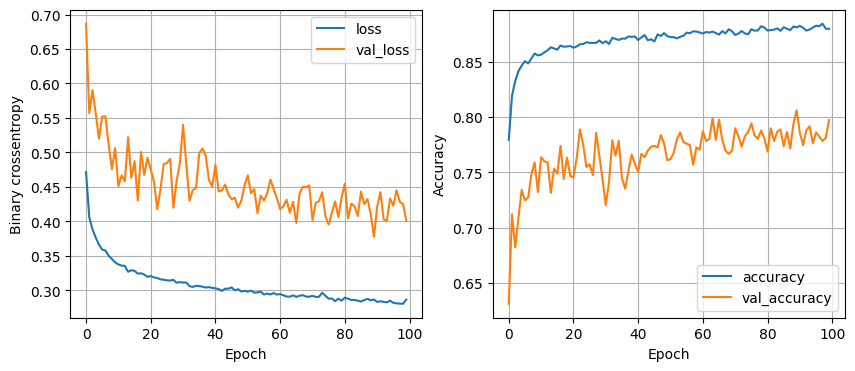

64 nodes, drop 0.2, learning rate 0.001, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7688 - loss: 0.4903 - val_accuracy: 0.6238 - val_loss: 0.6640
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8114 - loss: 0.4141 - val_accuracy: 0.6879 - val_loss: 0.5908
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8234 - loss: 0.3991 - val_accuracy: 0.6964 - val_loss: 0.5818
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8320 - loss: 0.3863 - val_accuracy: 0.6964 - val_loss: 0.6030
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8434 - loss: 0.3779 - val_accuracy: 0.7205 - val_loss: 0.5573
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8423 - loss: 0.3719 - val_accuracy: 0.7365 - val_loss: 0.5381
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8429 - loss: 0.3666 - val_accuracy: 0.7226 - val_loss: 0.5488
Epoch 8/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - a

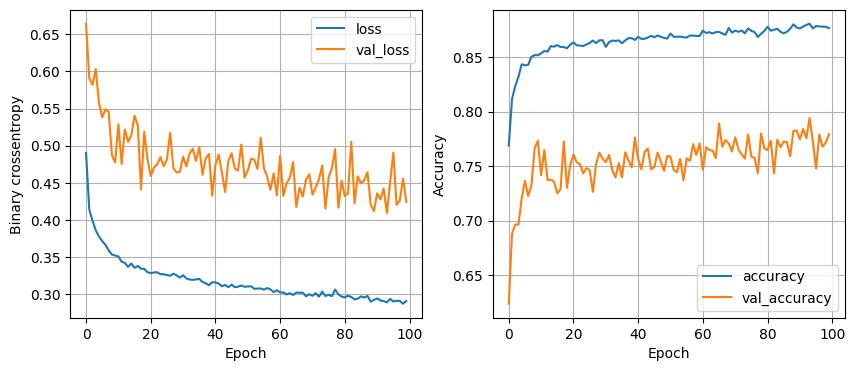

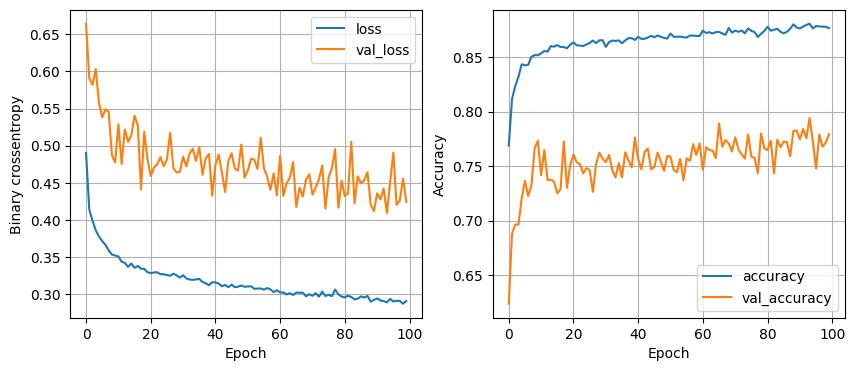

In [34]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100

for num_nodes in [16, 32, 64]:
    for dropout_prod in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(
                    f'{num_nodes} nodes, drop {dropout_prod}, learning rate {lr}, batch size {batch_size}')
                model, history = train_model(
                    X_train, y_train, num_nodes, dropout_prod, lr, batch_size, epochs)
                plot_history(history)

                val_loss = model.evaluate(X_valid, y_valid, verbose=0)
                if isinstance(val_loss, list):
                    val_loss = val_loss[0]  # extract only the loss value

                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model

plot_history(history)

In [35]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.78      0.84      2467
           1       0.81      0.93      0.87      2467

    accuracy                           0.86      4934
   macro avg       0.86      0.86      0.85      4934
weighted avg       0.86      0.86      0.85      4934

